# Empirical Pseudopotential Convergence Tests

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn')
import time

In [3]:
from BZI.pseudopots import Al_EPM, multiple_free_EPM
from BZI.plots import (plot_band_structure, plot_all_bz, plot_mesh, 
                       create_convergence_plot)
from BZI.tetrahedron import grid_and_tetrahedra
from BZI.symmetry import make_ptvecs, make_rptvecs, find_orbits, map_to_bz
from BZI.sampling import make_grid
from BZI.integration import rectangular_method, rectangular_fermi_level

## Brillouin zone, irreducible Brillouin zone, and high symmetry points

<IPython.core.display.Javascript object>


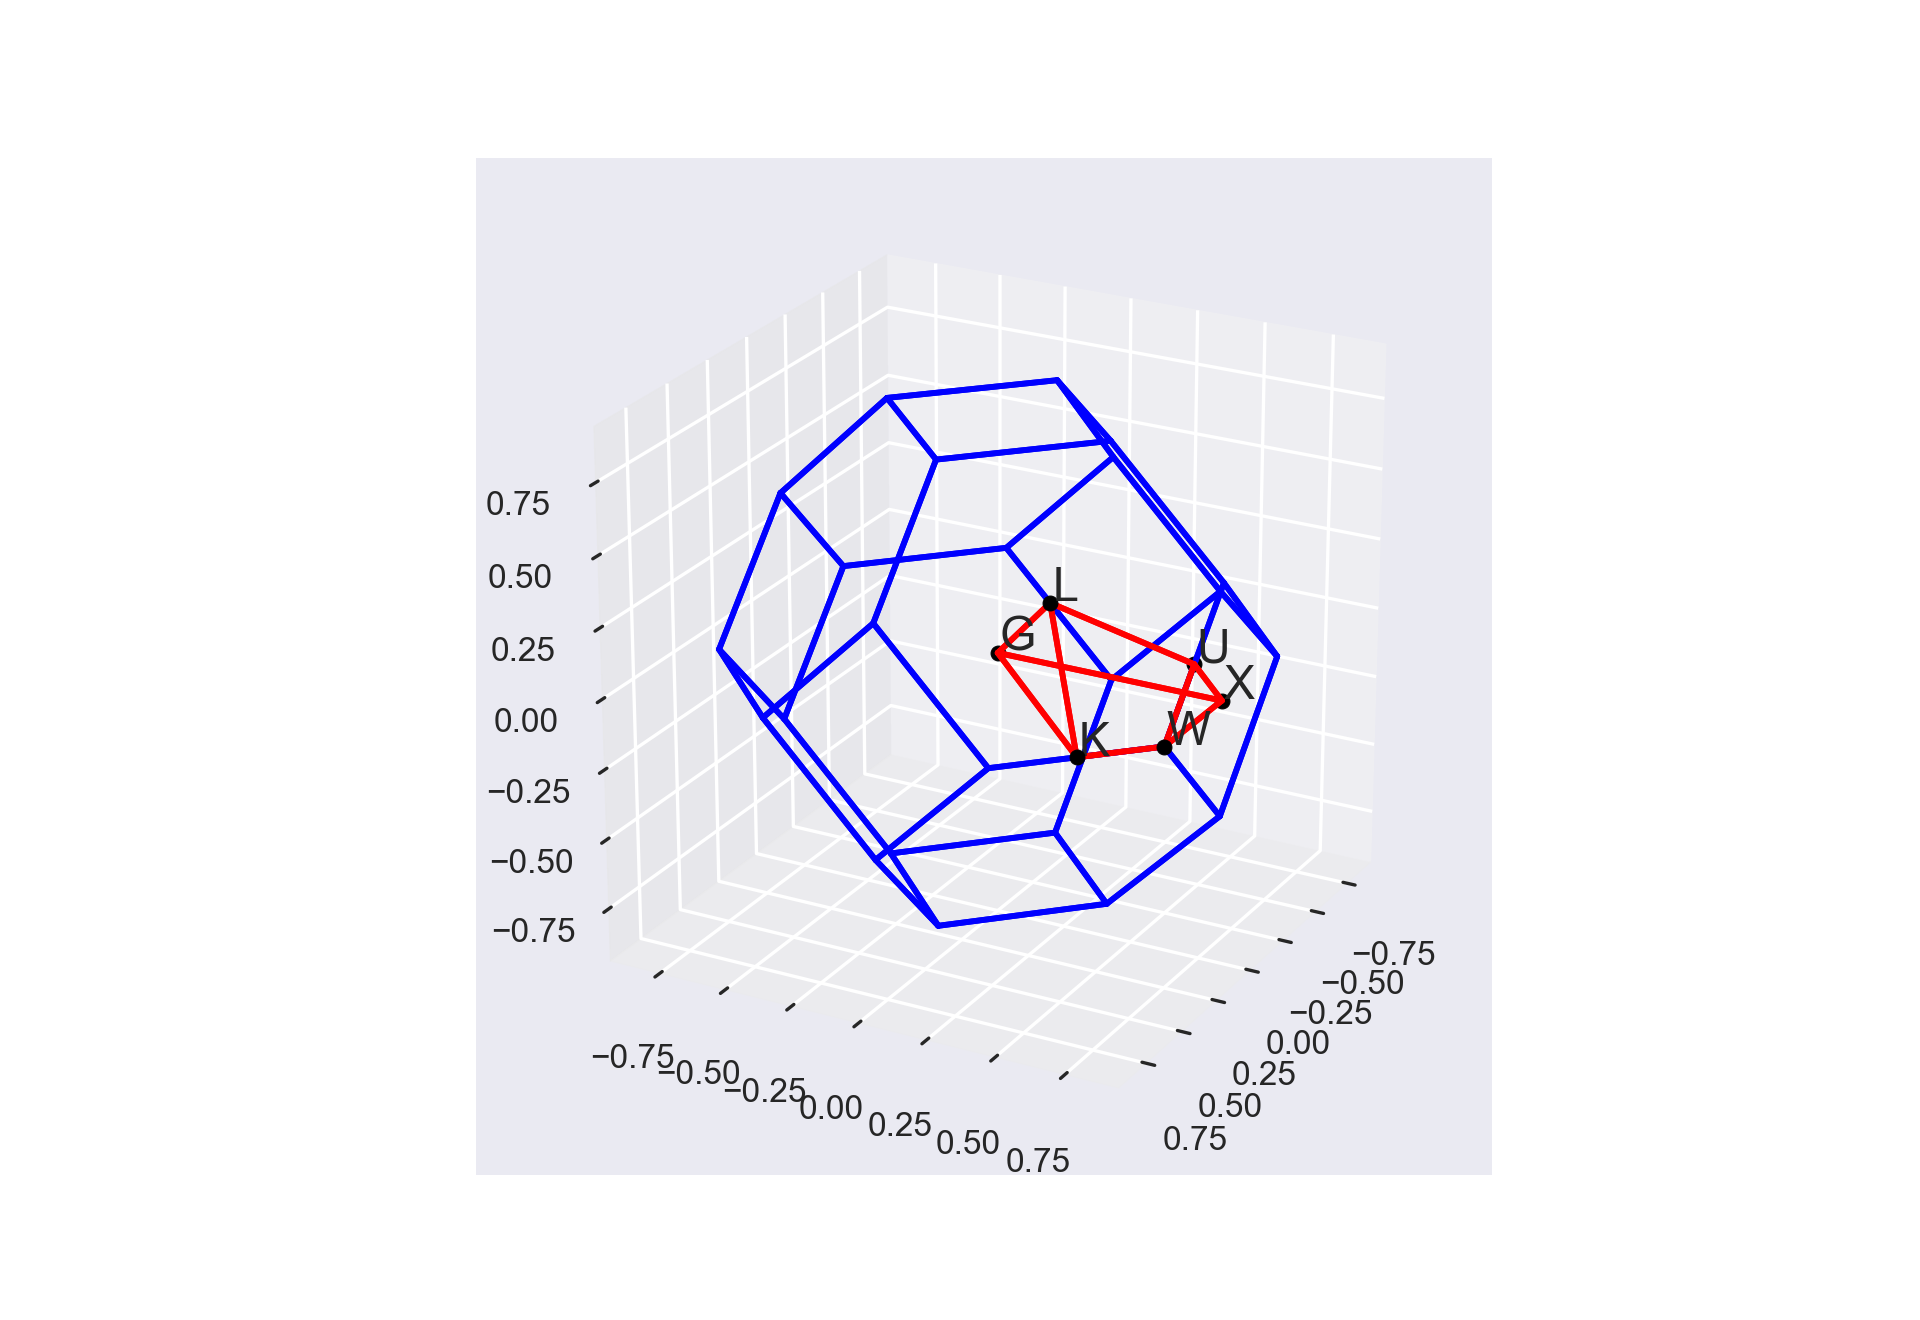

<IPython.core.display.Javascript object>


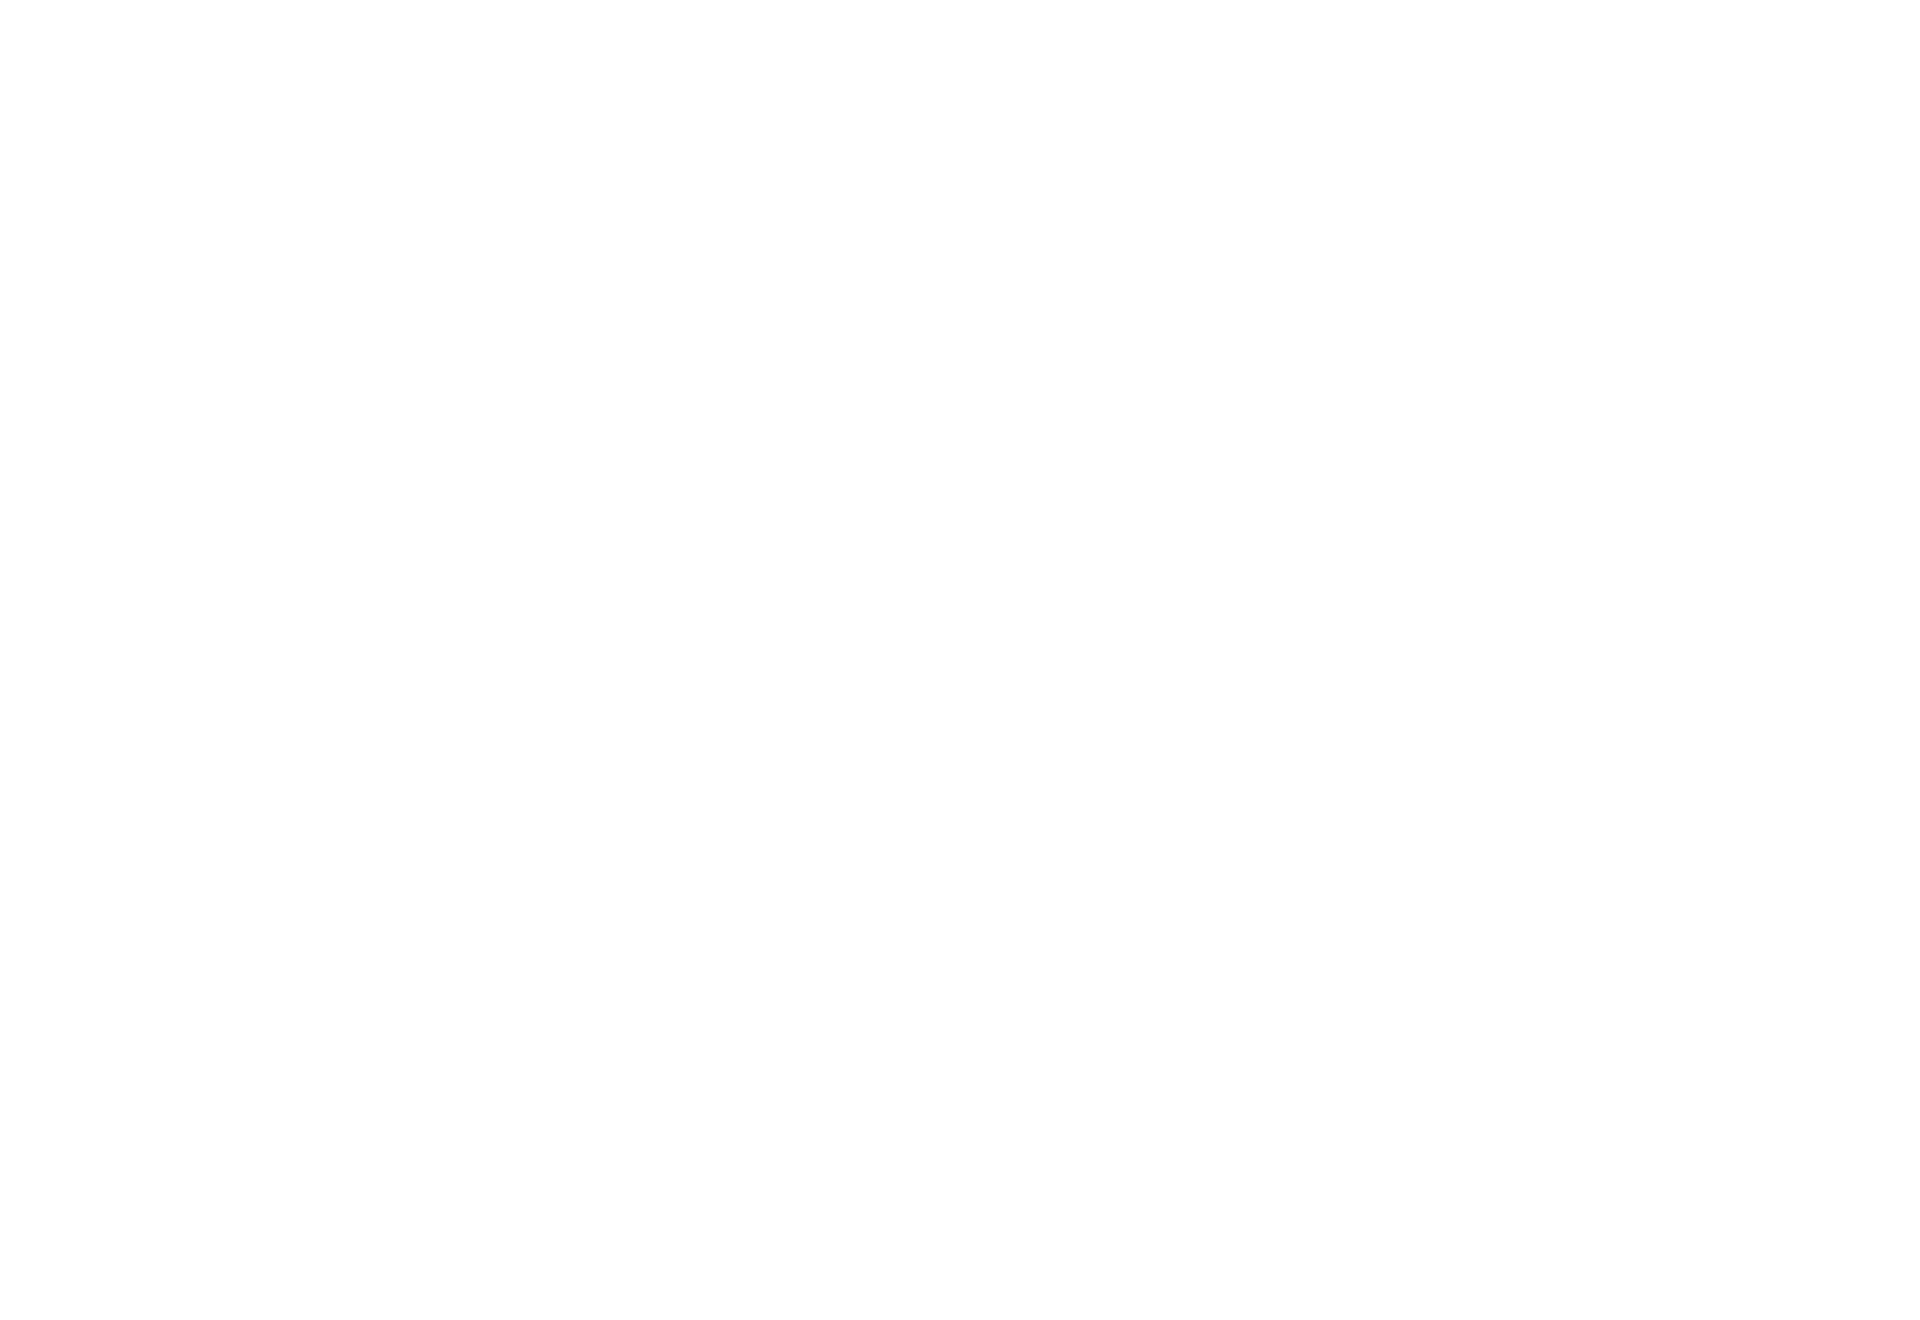

<IPython.core.display.Javascript object>


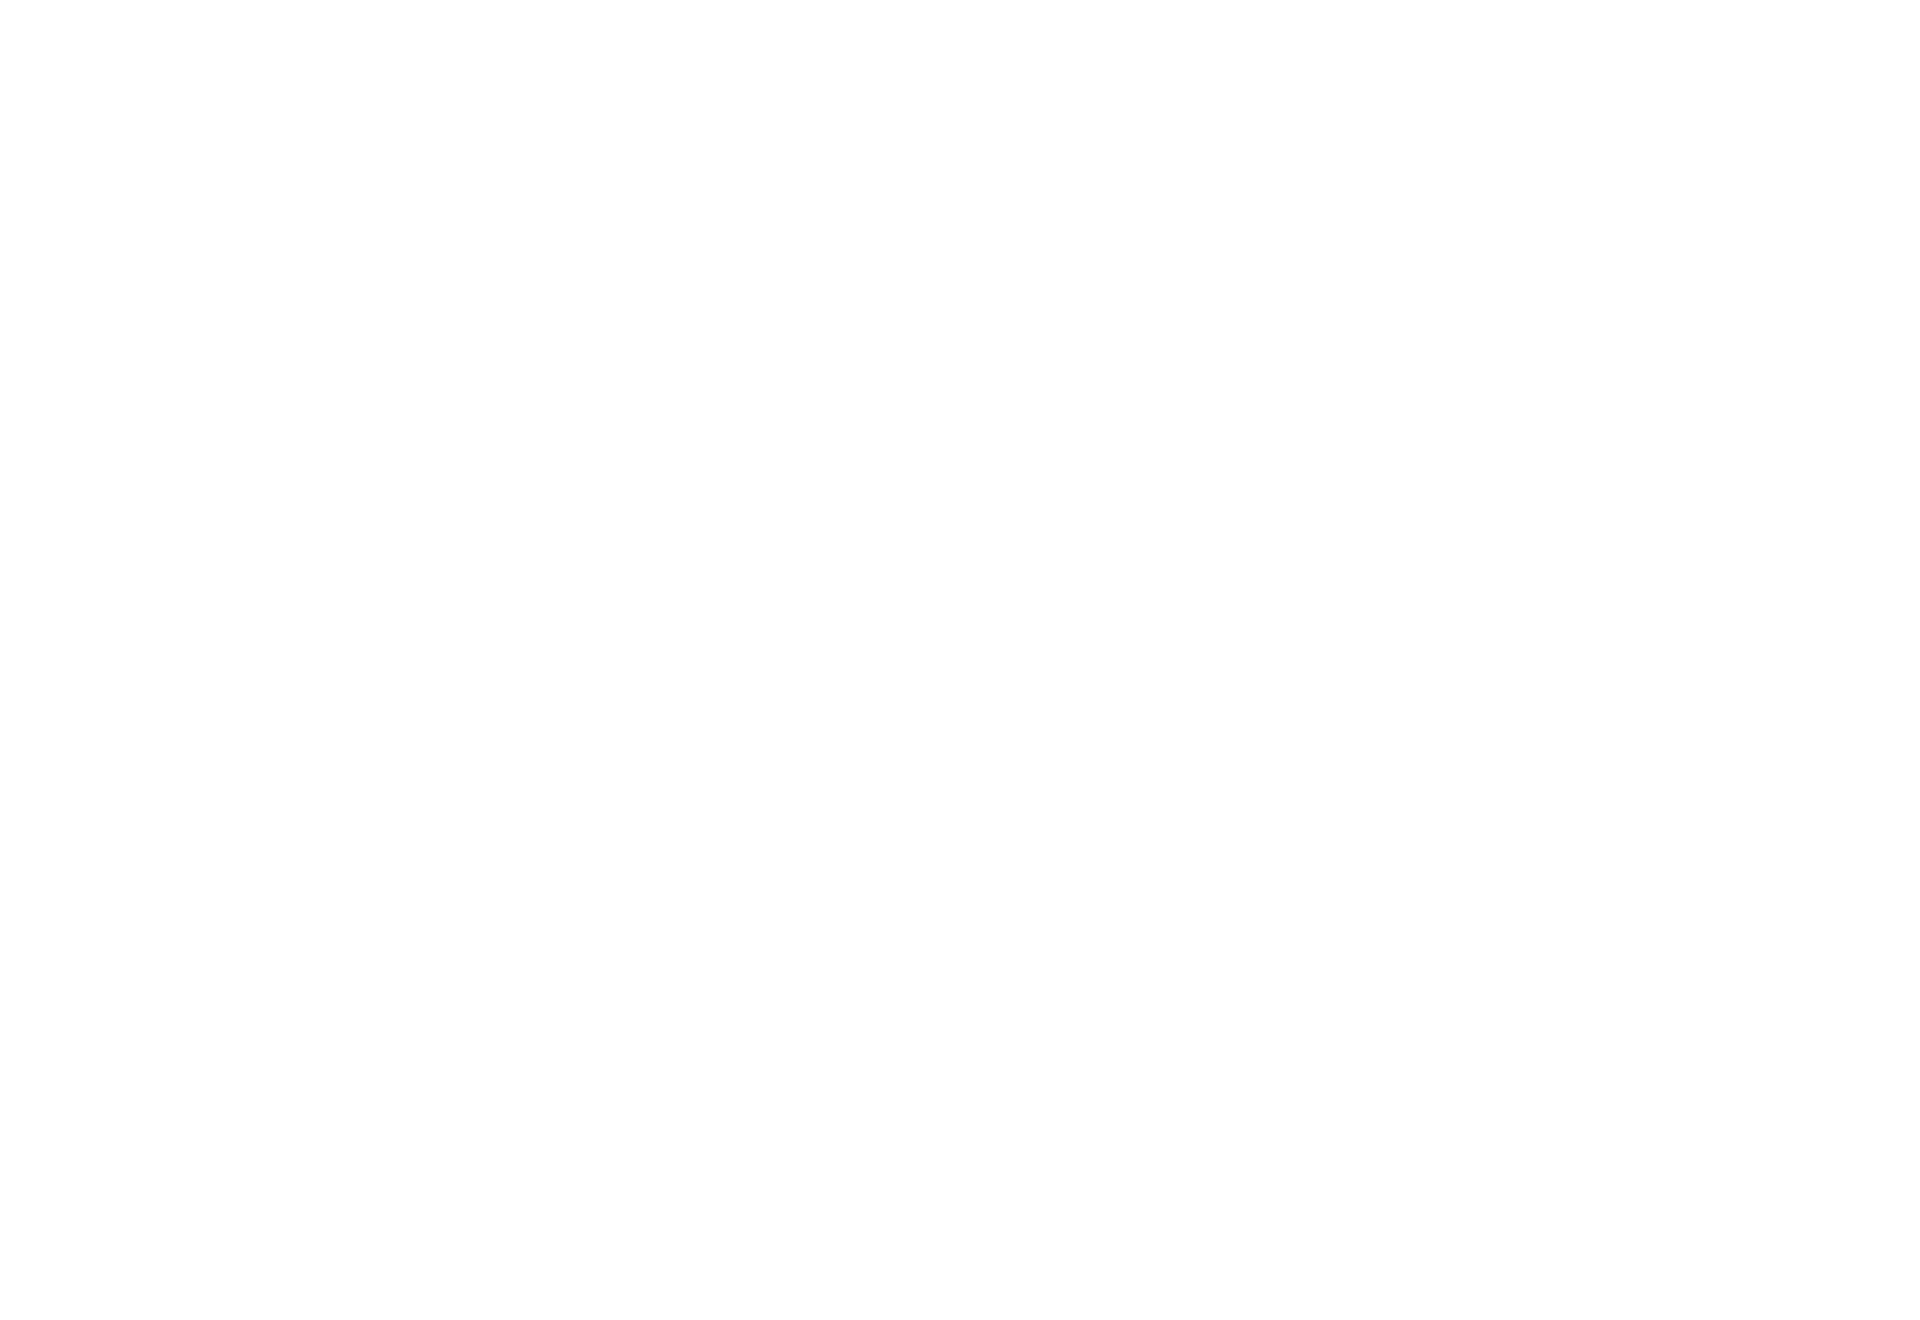

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')

plot_all_bz(Al_EPM.lattice.type,
            Al_EPM.lattice.vectors,
            sympts=Al_EPM.lattice.symmetry_points,
            ax=ax,
            convention="angular")

## Band structure

<IPython.core.display.Javascript object>


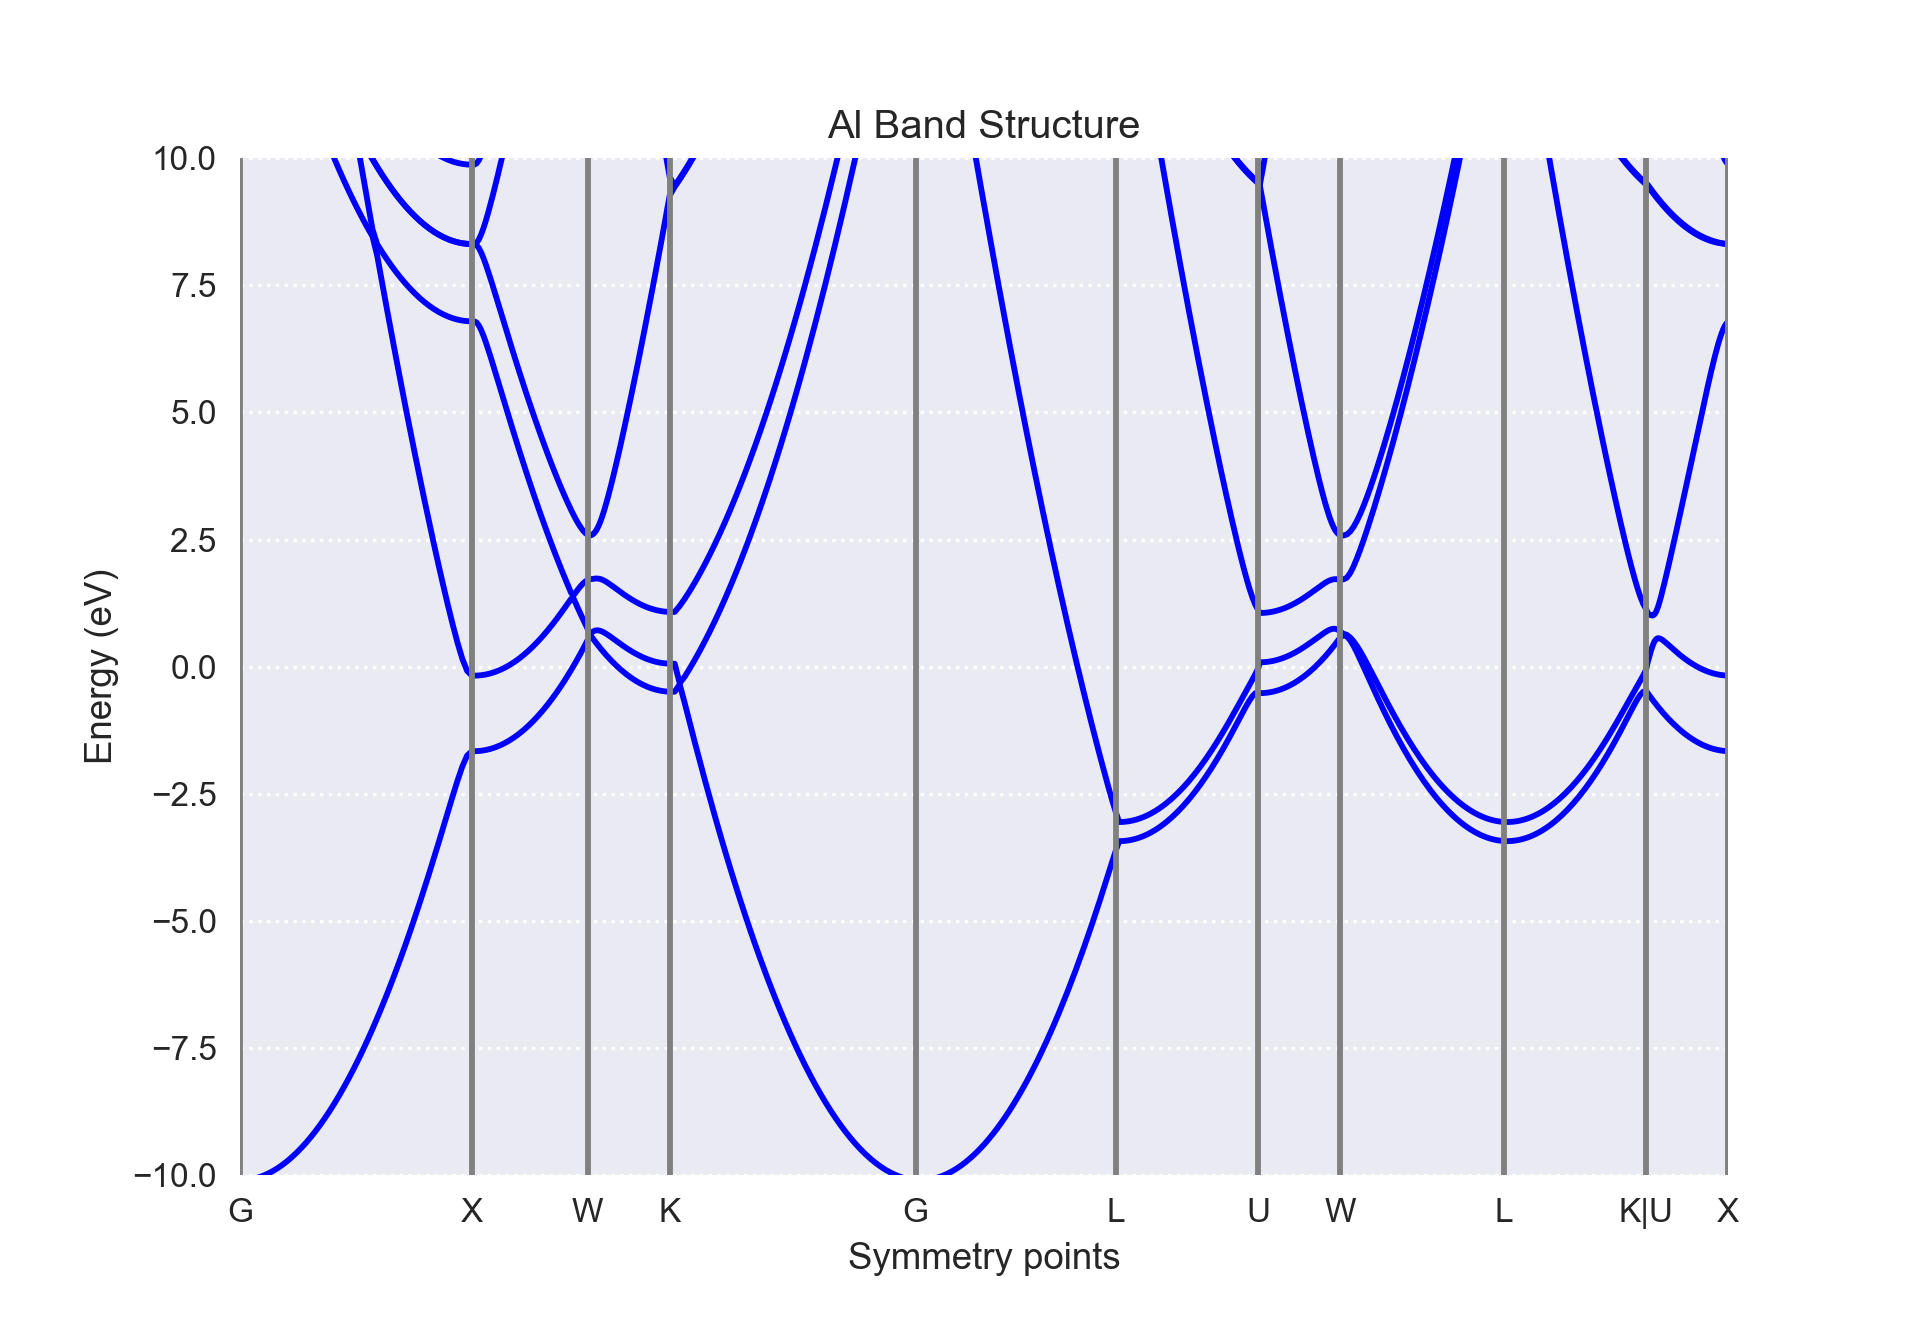

In [7]:
Al_energy_shift = 10
Al_params = {"materials_list": ["Al"],
             "EPMlist": [Al_EPM],
             "EPMargs_list": [{}],
             "lattice": Al_EPM.lattice,
             "npts": 50,
             "neigvals": 10,
             "energy_shift": Al_energy_shift,
             "energy_limits": [-10,10],
             "show": True,
             "save": True}
plot_band_structure(**Al_params)

## Tetrahedra grid

<IPython.core.display.Javascript object>


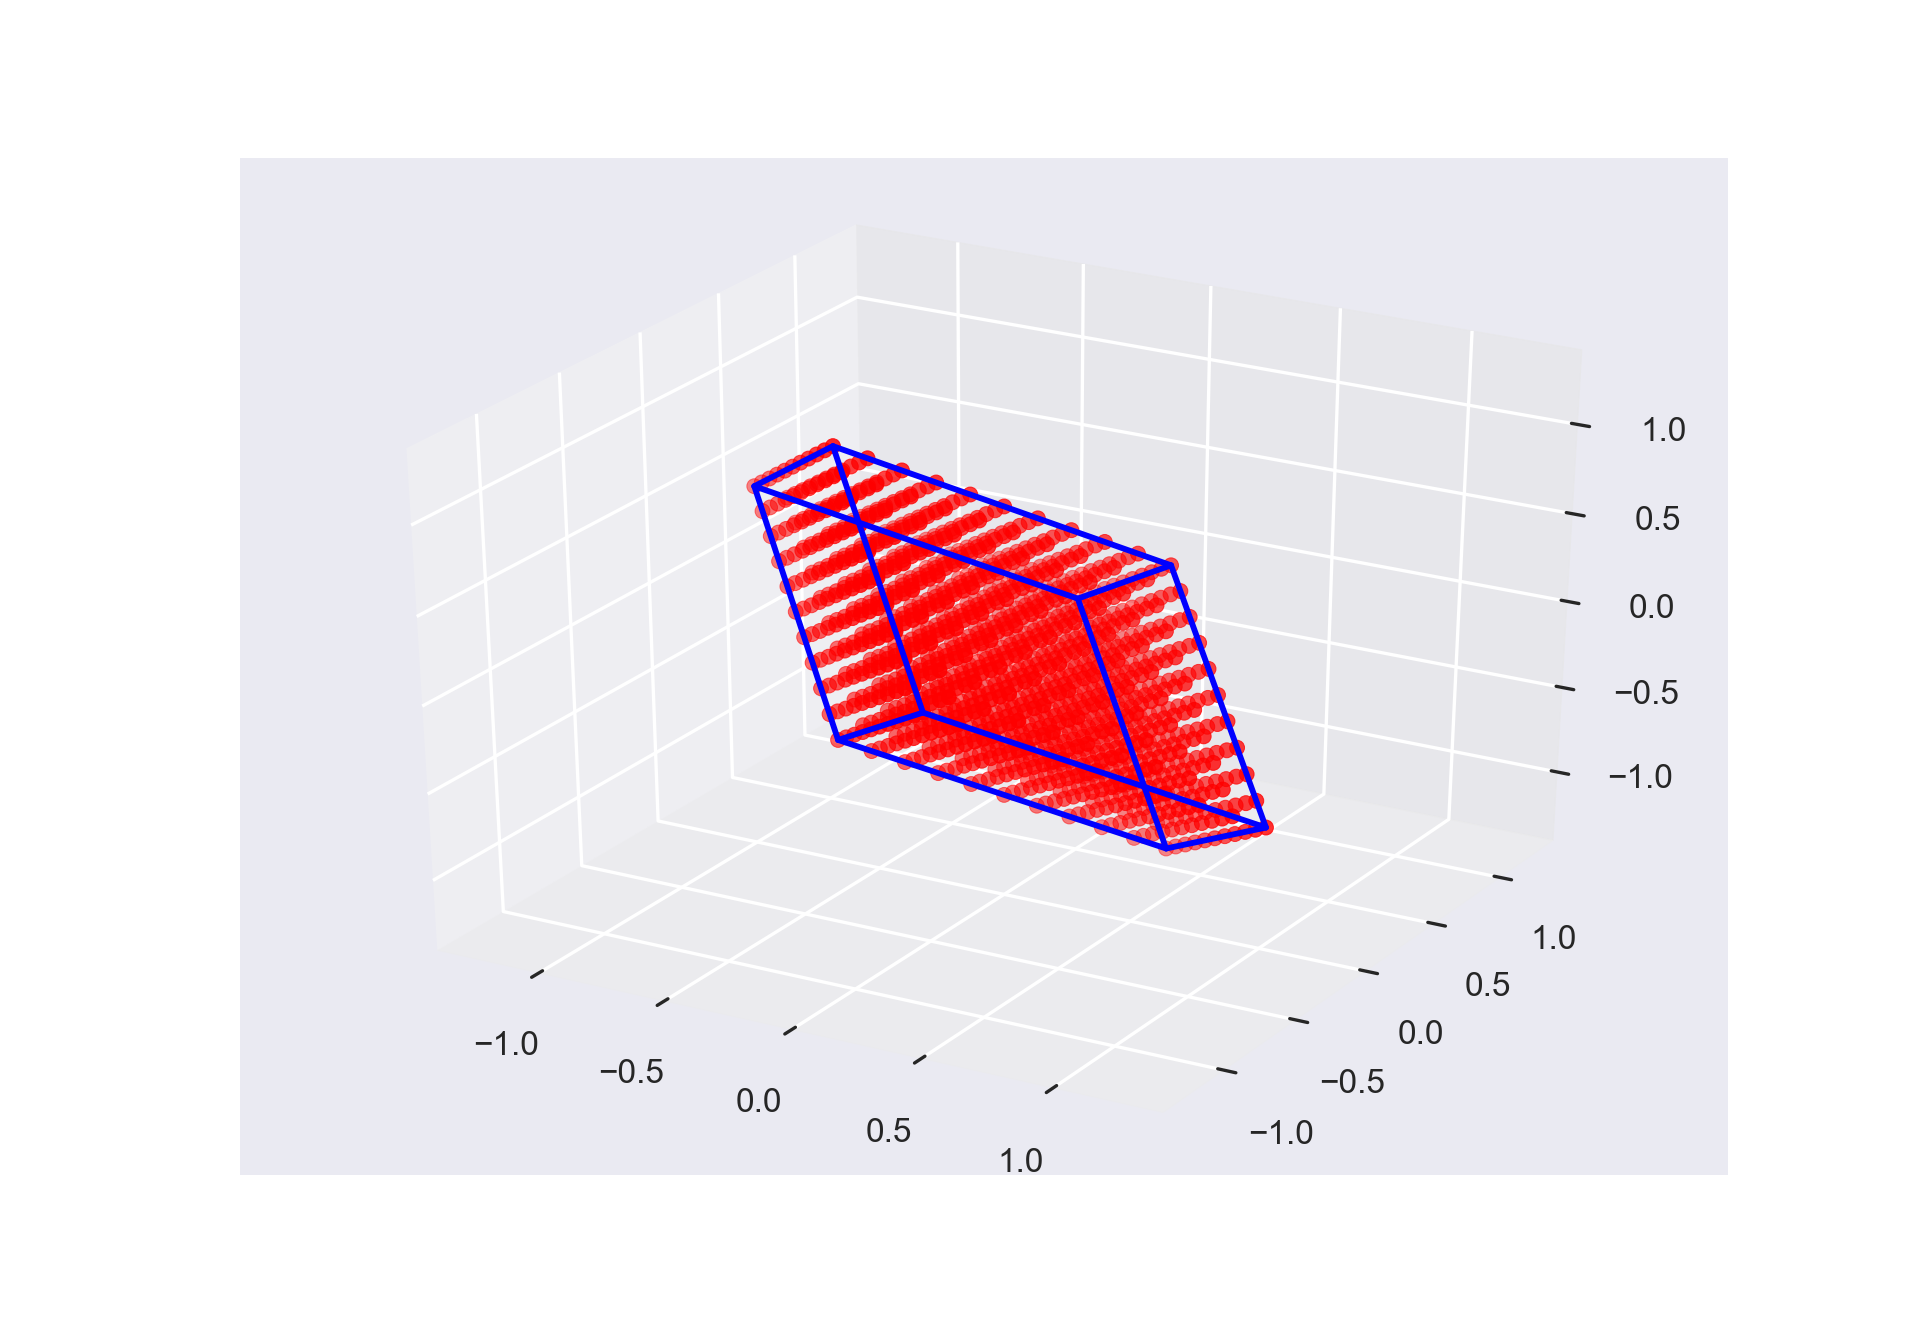

In [8]:
ndivs= 10
lat_shift = [-1./2]*3
grid_shift = [0,0,0]
tet_grid, tetrahedra = grid_and_tetrahedra(Al_EPM, ndivs, lat_shift, grid_shift)
weights = np.ones(len(tetrahedra))

plot_offset = np.dot(Al_EPM.lattice.reciprocal_vectors, lat_shift)
plot_mesh(tet_grid, Al_EPM.lattice.reciprocal_vectors, plot_offset)

## Rectangles grid

<IPython.core.display.Javascript object>


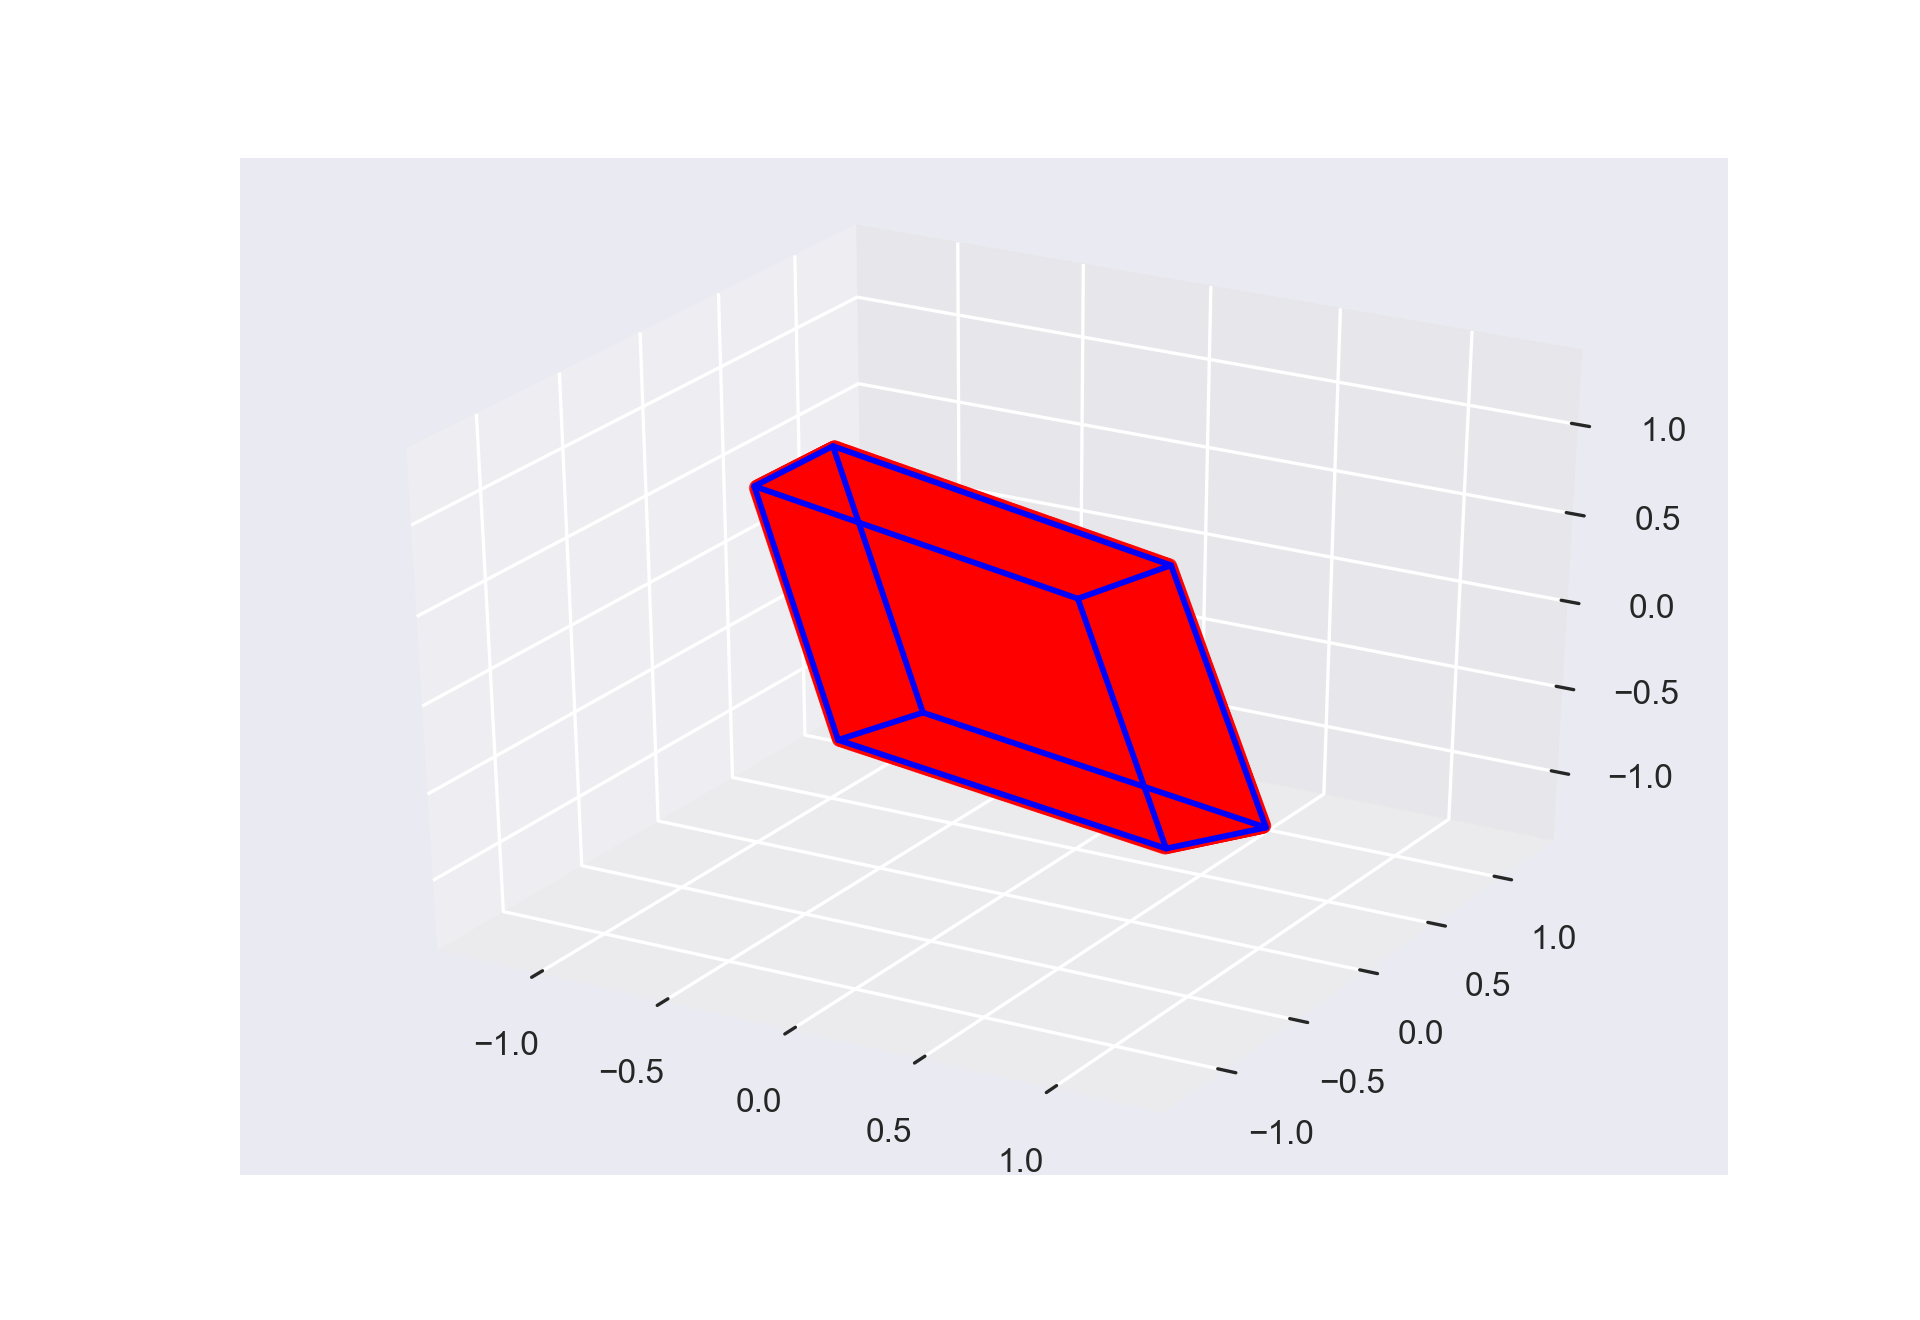

In [10]:
ndivs = 100
grid_consts = np.array(Al_EPM.lattice.constants)*ndivs
grid_centering = "face"
grid_angles = [np.pi/2]*3

grid_vecs = make_ptvecs(grid_centering, grid_consts, grid_angles)
rgrid_vecs = make_rptvecs(grid_vecs, convention="angular")

lat_shift = [-1./2]*3
offset = np.dot(inv(rgrid_vecs), -np.sum(Al_EPM.lattice.reciprocal_vectors, 1)/2) + (
         [0.5]*3)
rec_grid = make_grid(Al_EPM.lattice.reciprocal_vectors, rgrid_vecs, offset)

plot_offset = np.dot(Al_EPM.lattice.reciprocal_vectors, lat_shift)
plot_mesh(rec_grid, Al_EPM.lattice.reciprocal_vectors, plot_offset)

## Reduced rectangles grid

<IPython.core.display.Javascript object>


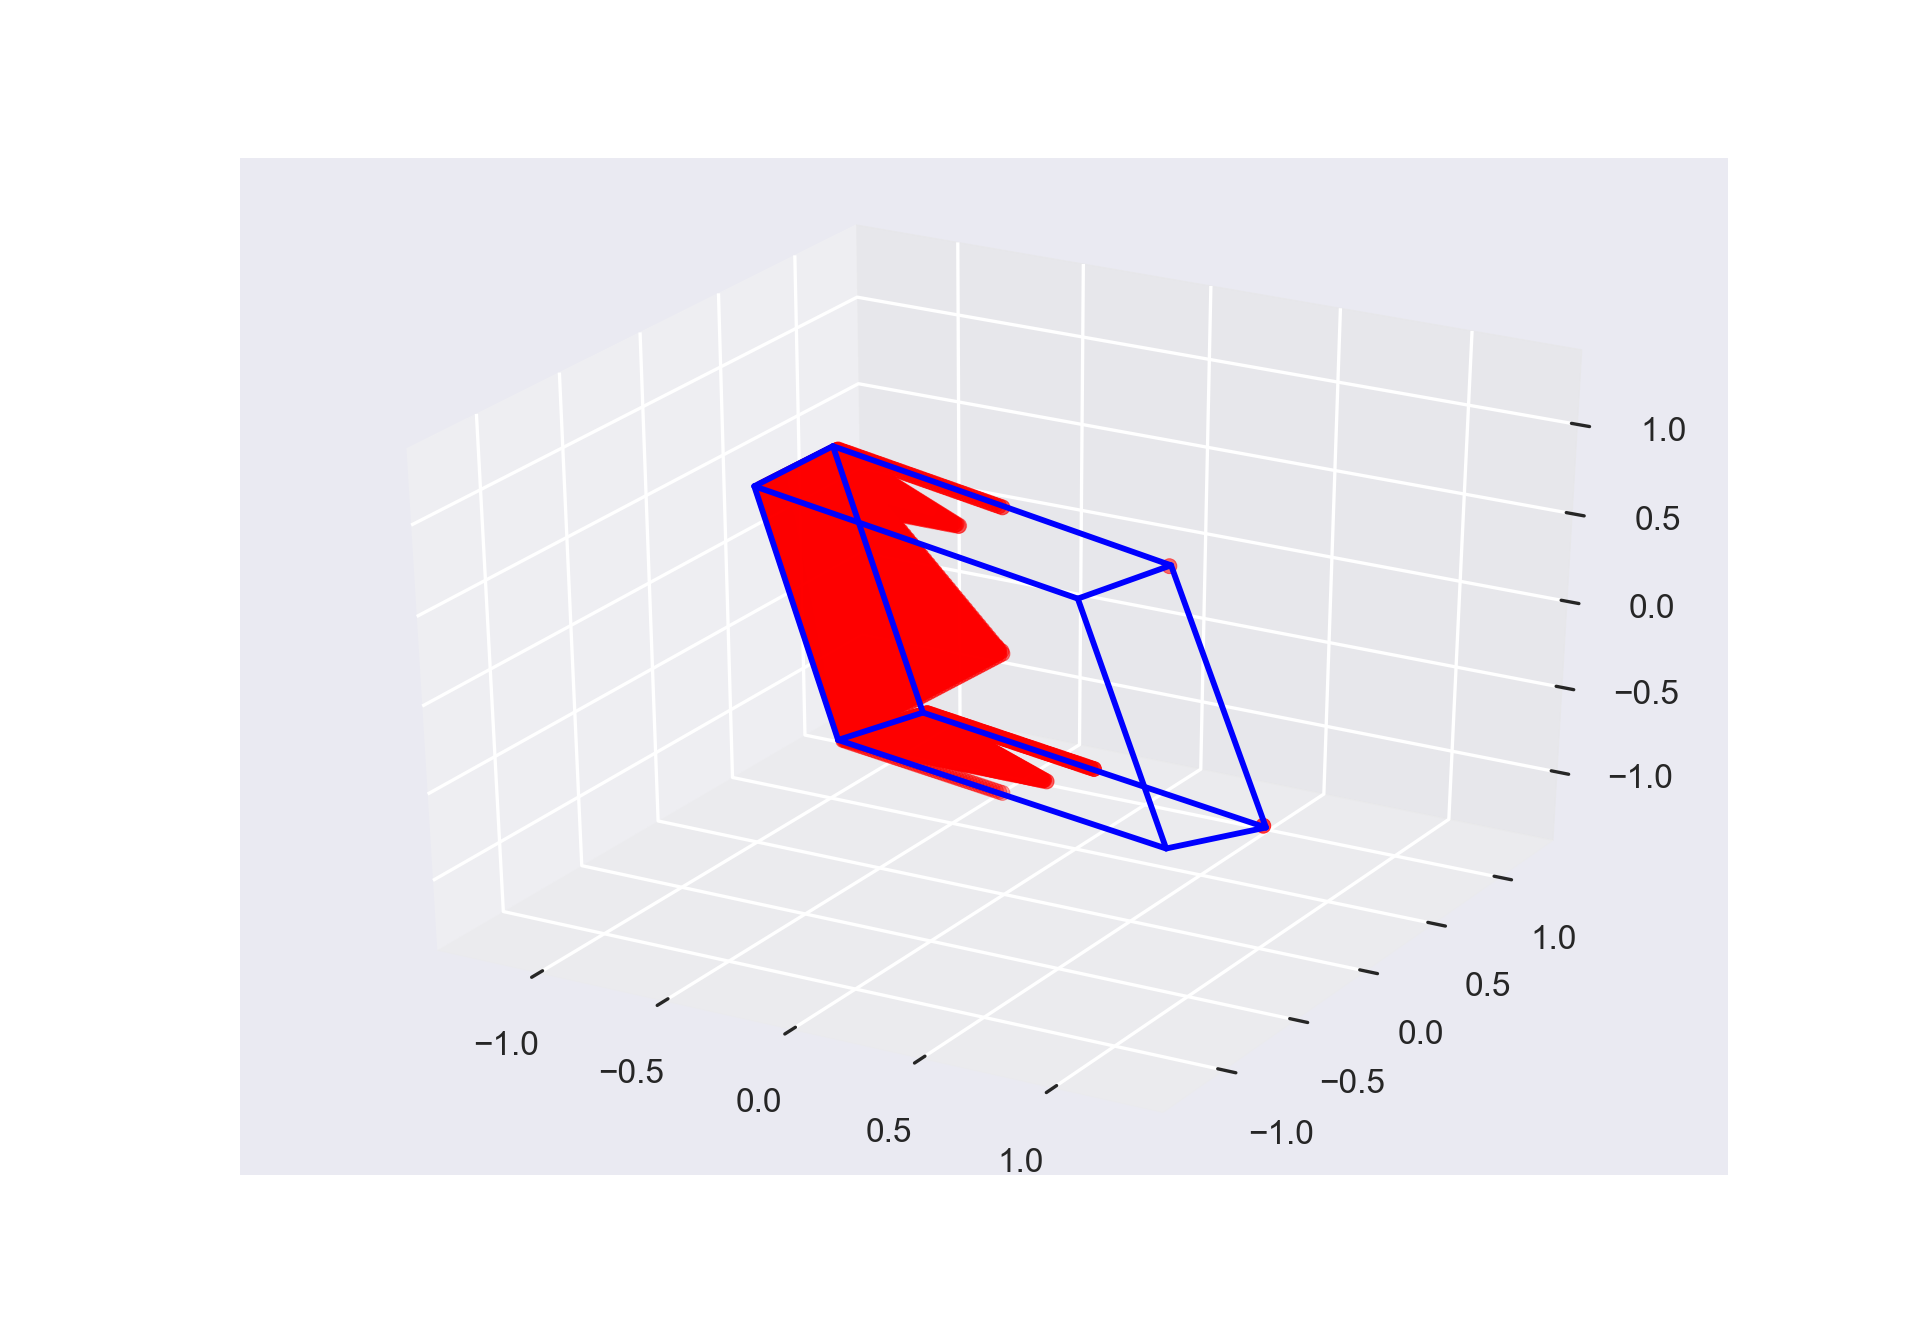

In [11]:
reduced_rec_grid, rec_weights = find_orbits(rec_grid,
                                            Al_EPM.lattice.reciprocal_vectors,
                                            rgrid_vecs, offset)
plot_mesh(reduced_rec_grid, Al_EPM.lattice.reciprocal_vectors, plot_offset)

## Reduced rectangles grid mapped to Brillouin zone

<IPython.core.display.Javascript object>


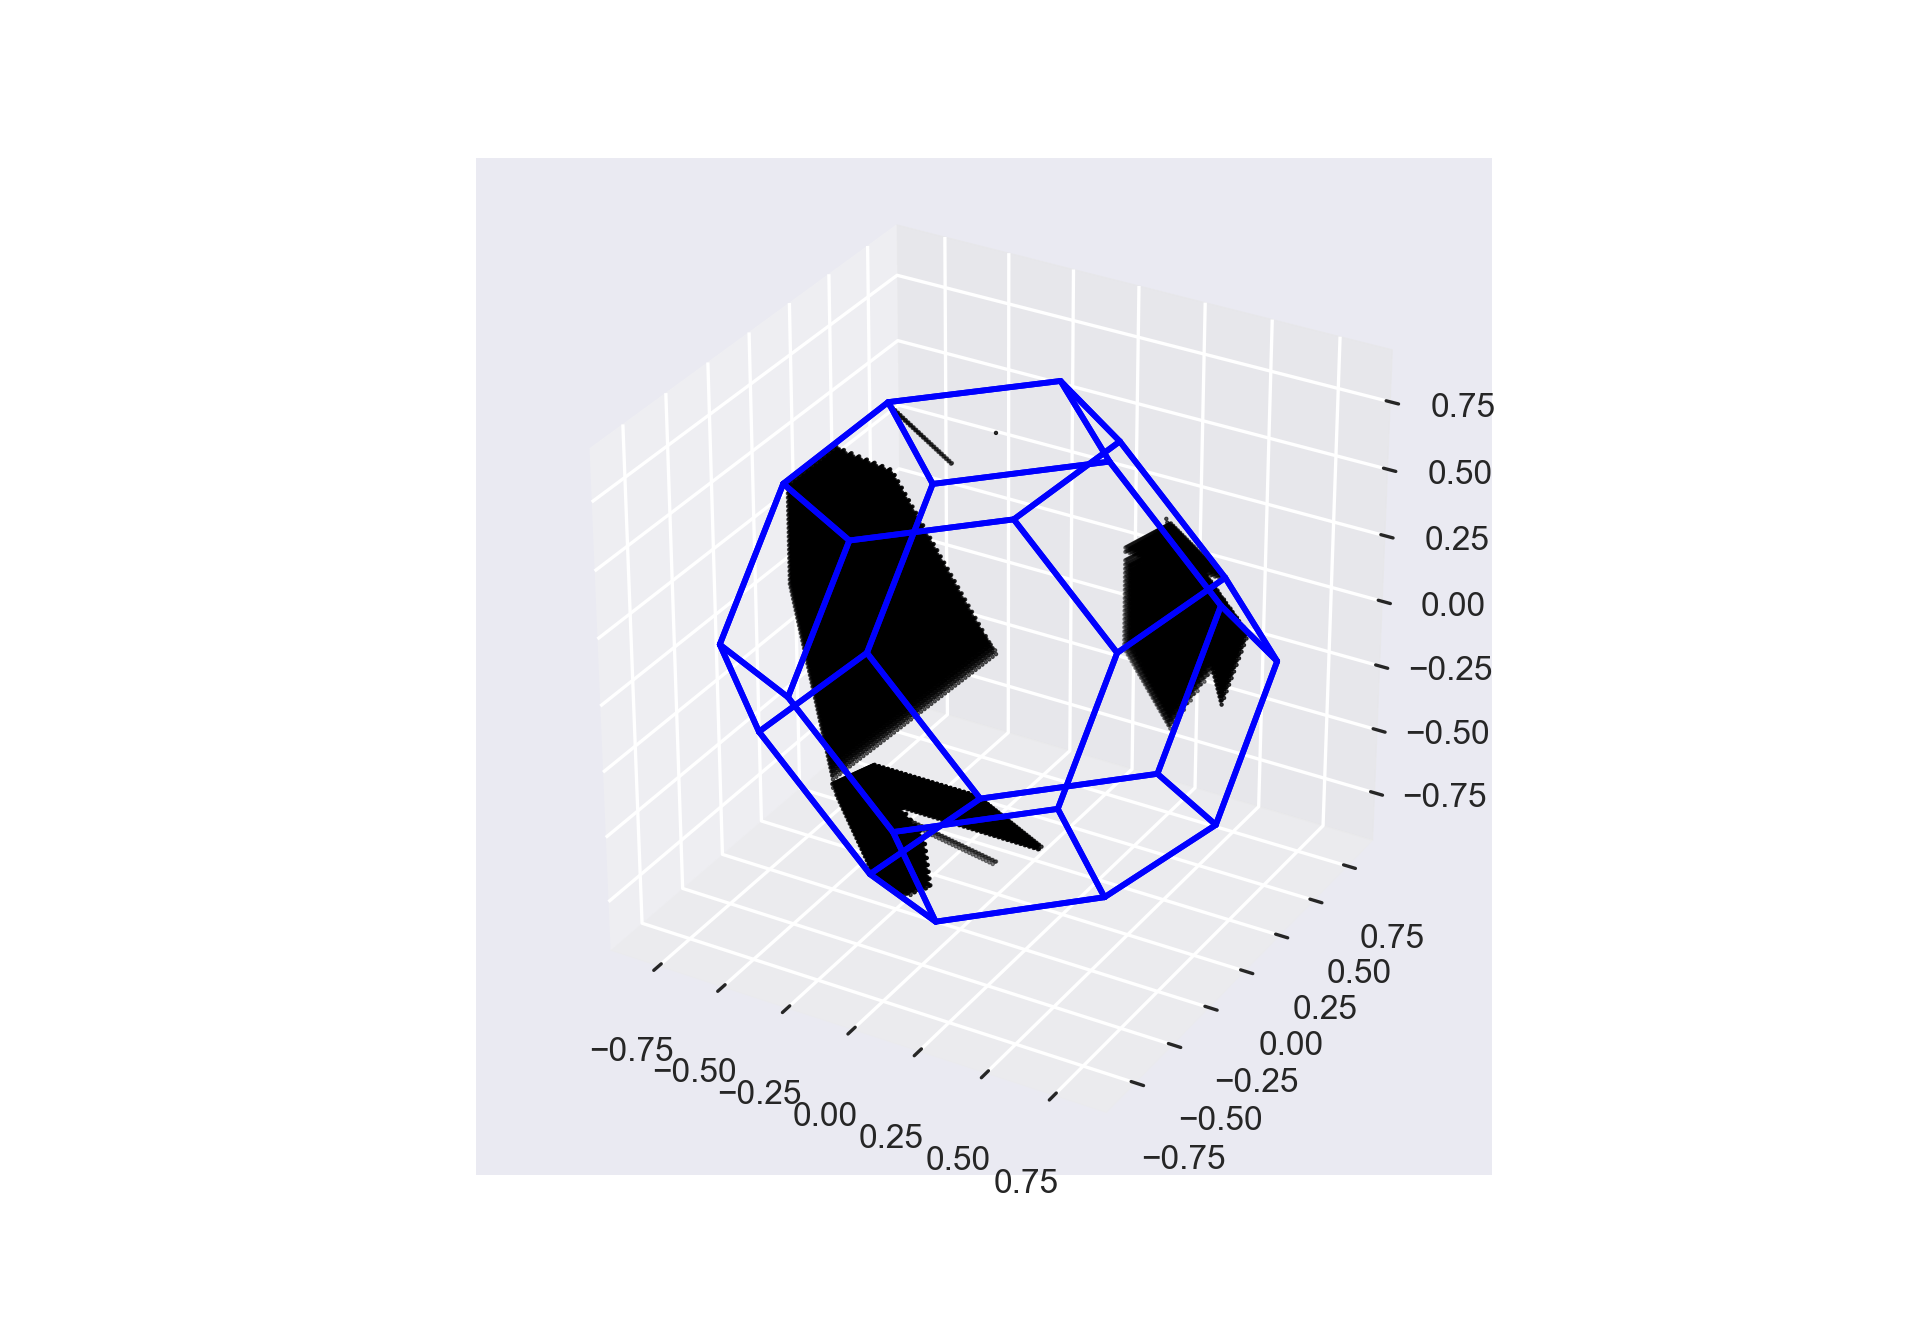

<IPython.core.display.Javascript object>


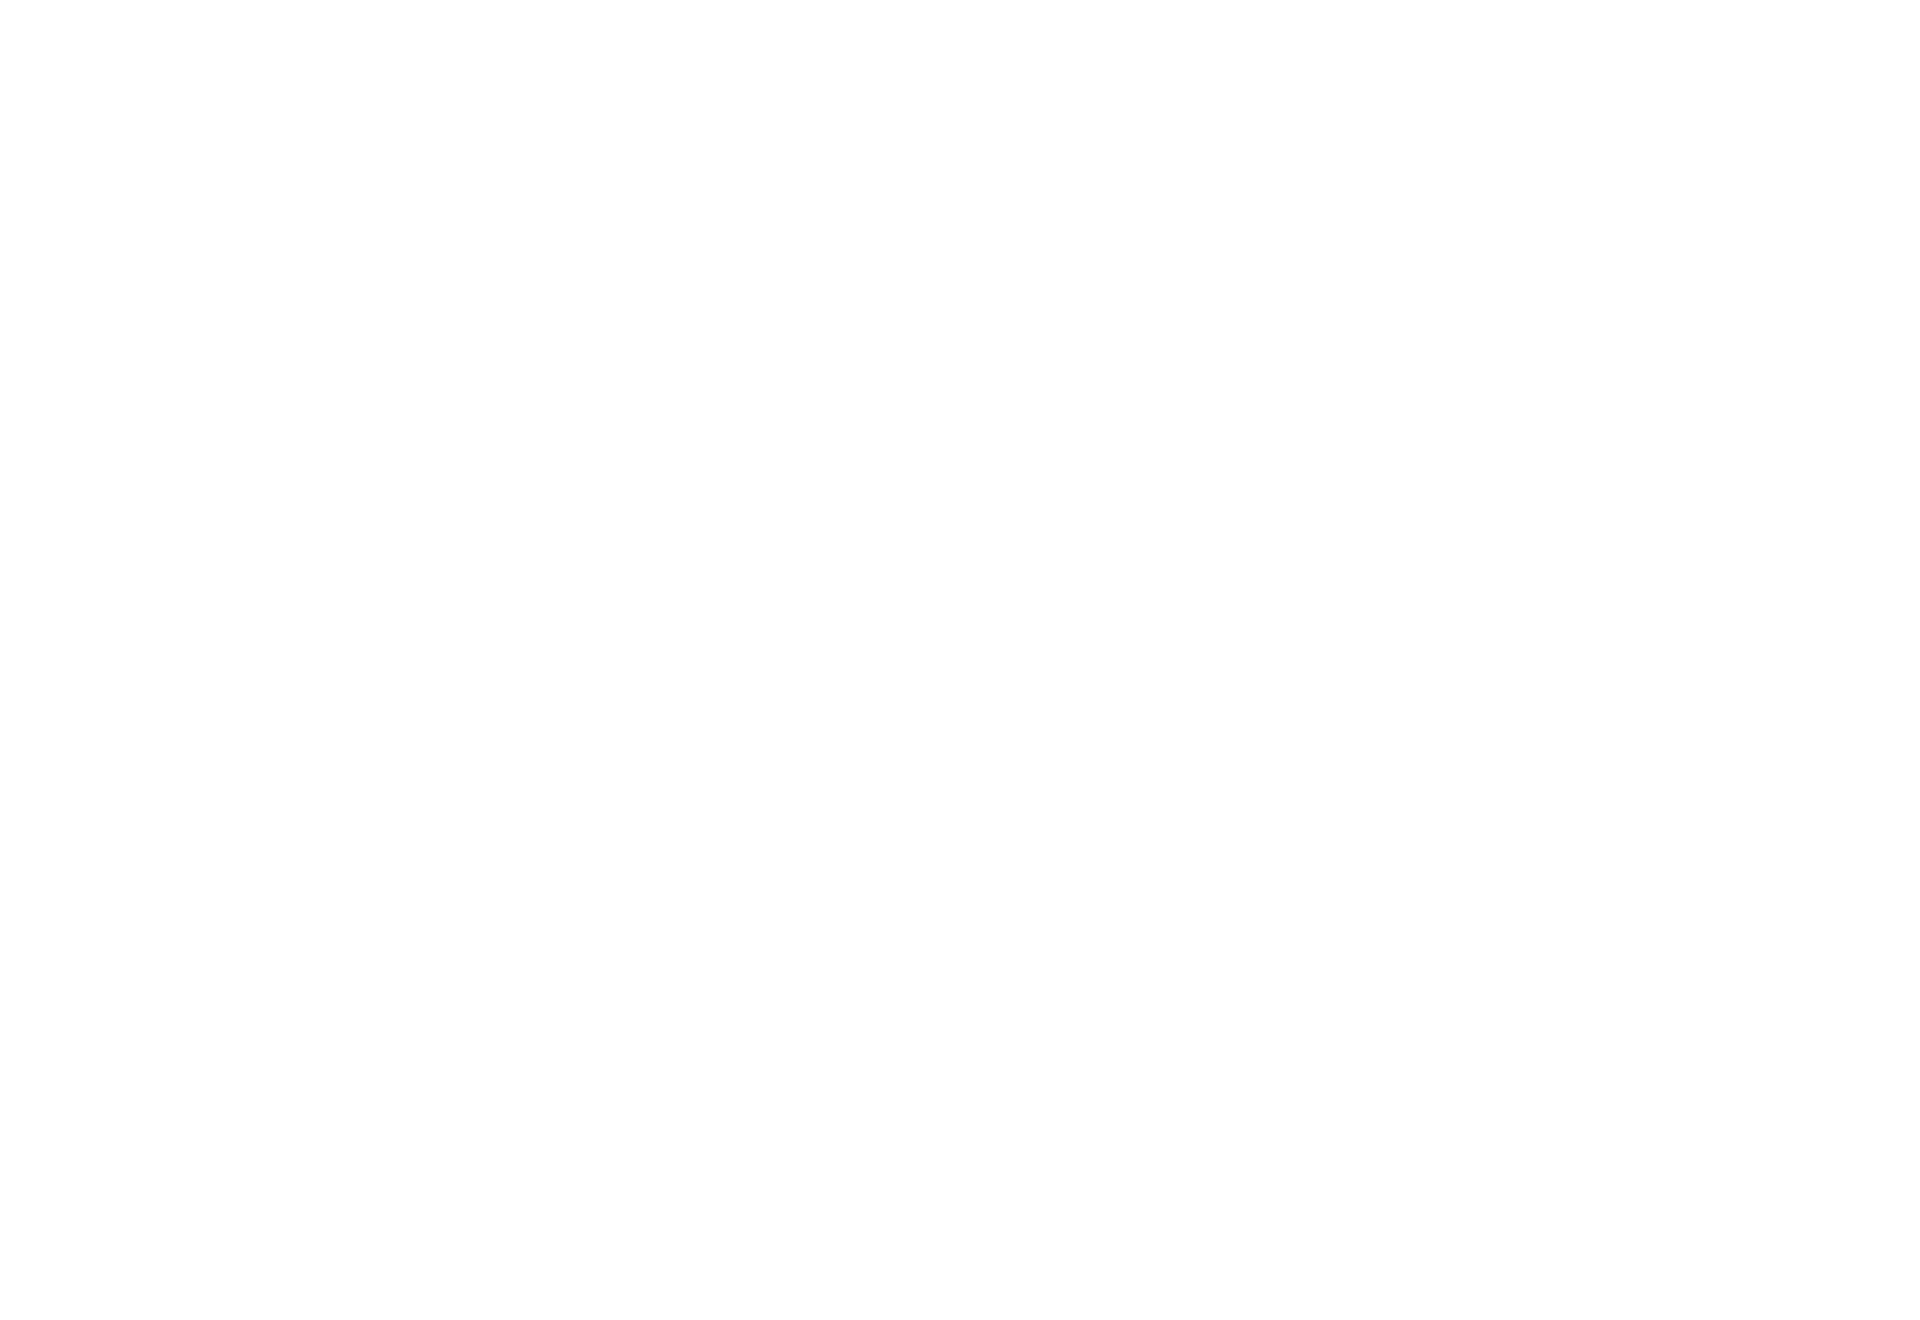

In [12]:
map_rec_grid, rec_grid_weights = map_to_bz(rec_grid,
                                           Al_EPM.lattice.reciprocal_vectors,
                                           rgrid_vecs, offset)
fig = plt.figure()
ax = fig.gca(projection='3d')

plot_all_bz(Al_EPM.lattice.type,
            Al_EPM.lattice.vectors,
            ax=ax, grid=map_rec_grid,
            convention="angular")

## Convergence tests

In [28]:
Al_answer = rectangular_method(Al_EPM, map_rec_grid, list(rec_grid_weights))

In [36]:
Al_EPM.total_energy_ans = Al_answer

In [38]:
Al_fl_answer = rectangular_fermi_level(Al_EPM, map_rec_grid, list(rec_grid_weights))

In [40]:
Al_EPM.fermi_level_ans = Al_fl_answer

In [63]:
Al_fl_answer

11.541713567938613

In [65]:
Al_EPM.fermi_level_ans

11.541713567938613

In [64]:
Al_EPM.total_energy_ans

-0.00013349051965688596

<IPython.core.display.Javascript object>


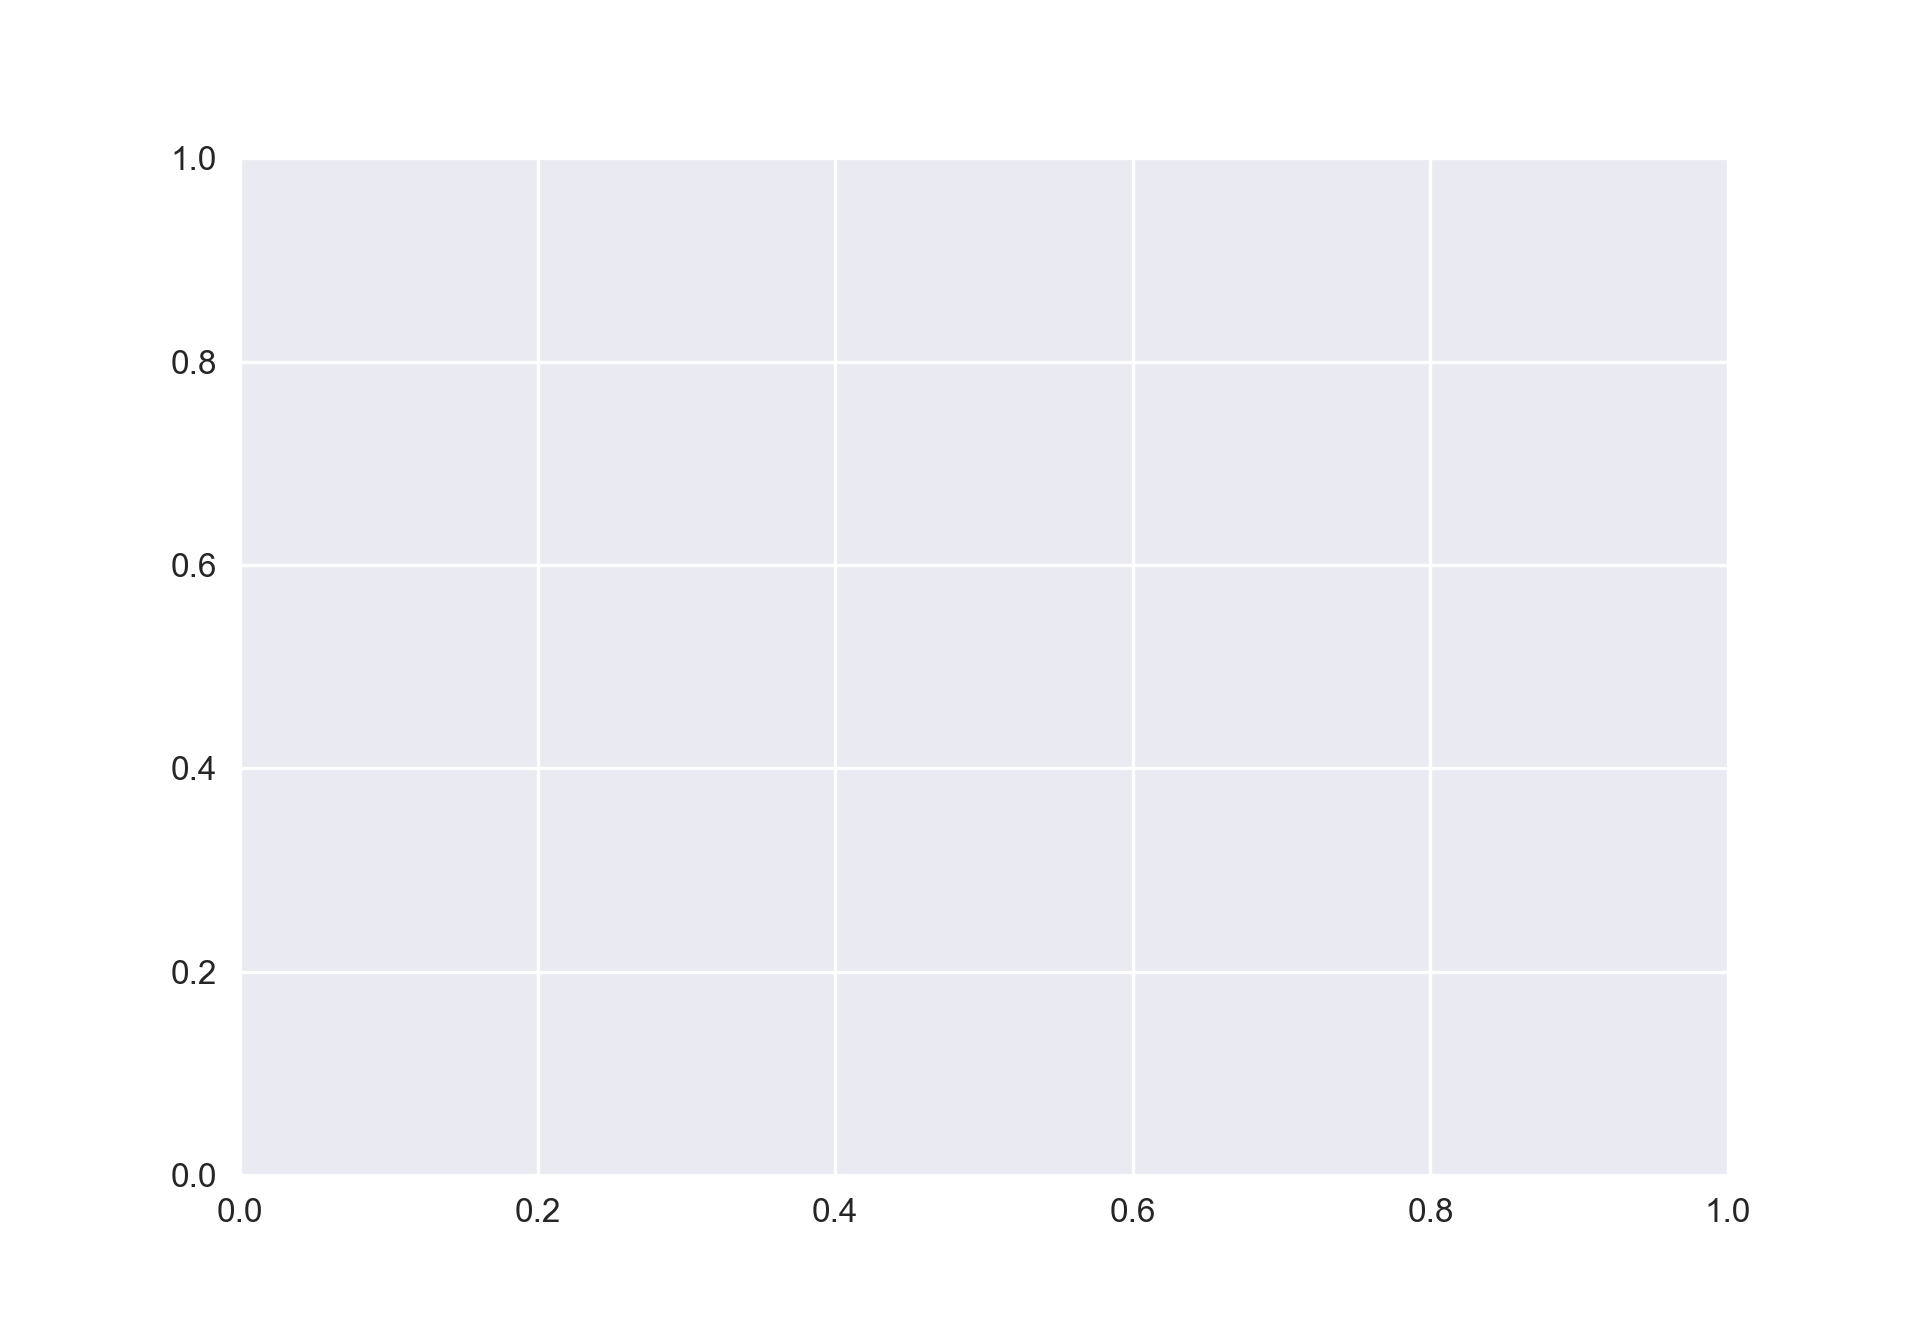

<IPython.core.display.Javascript object>


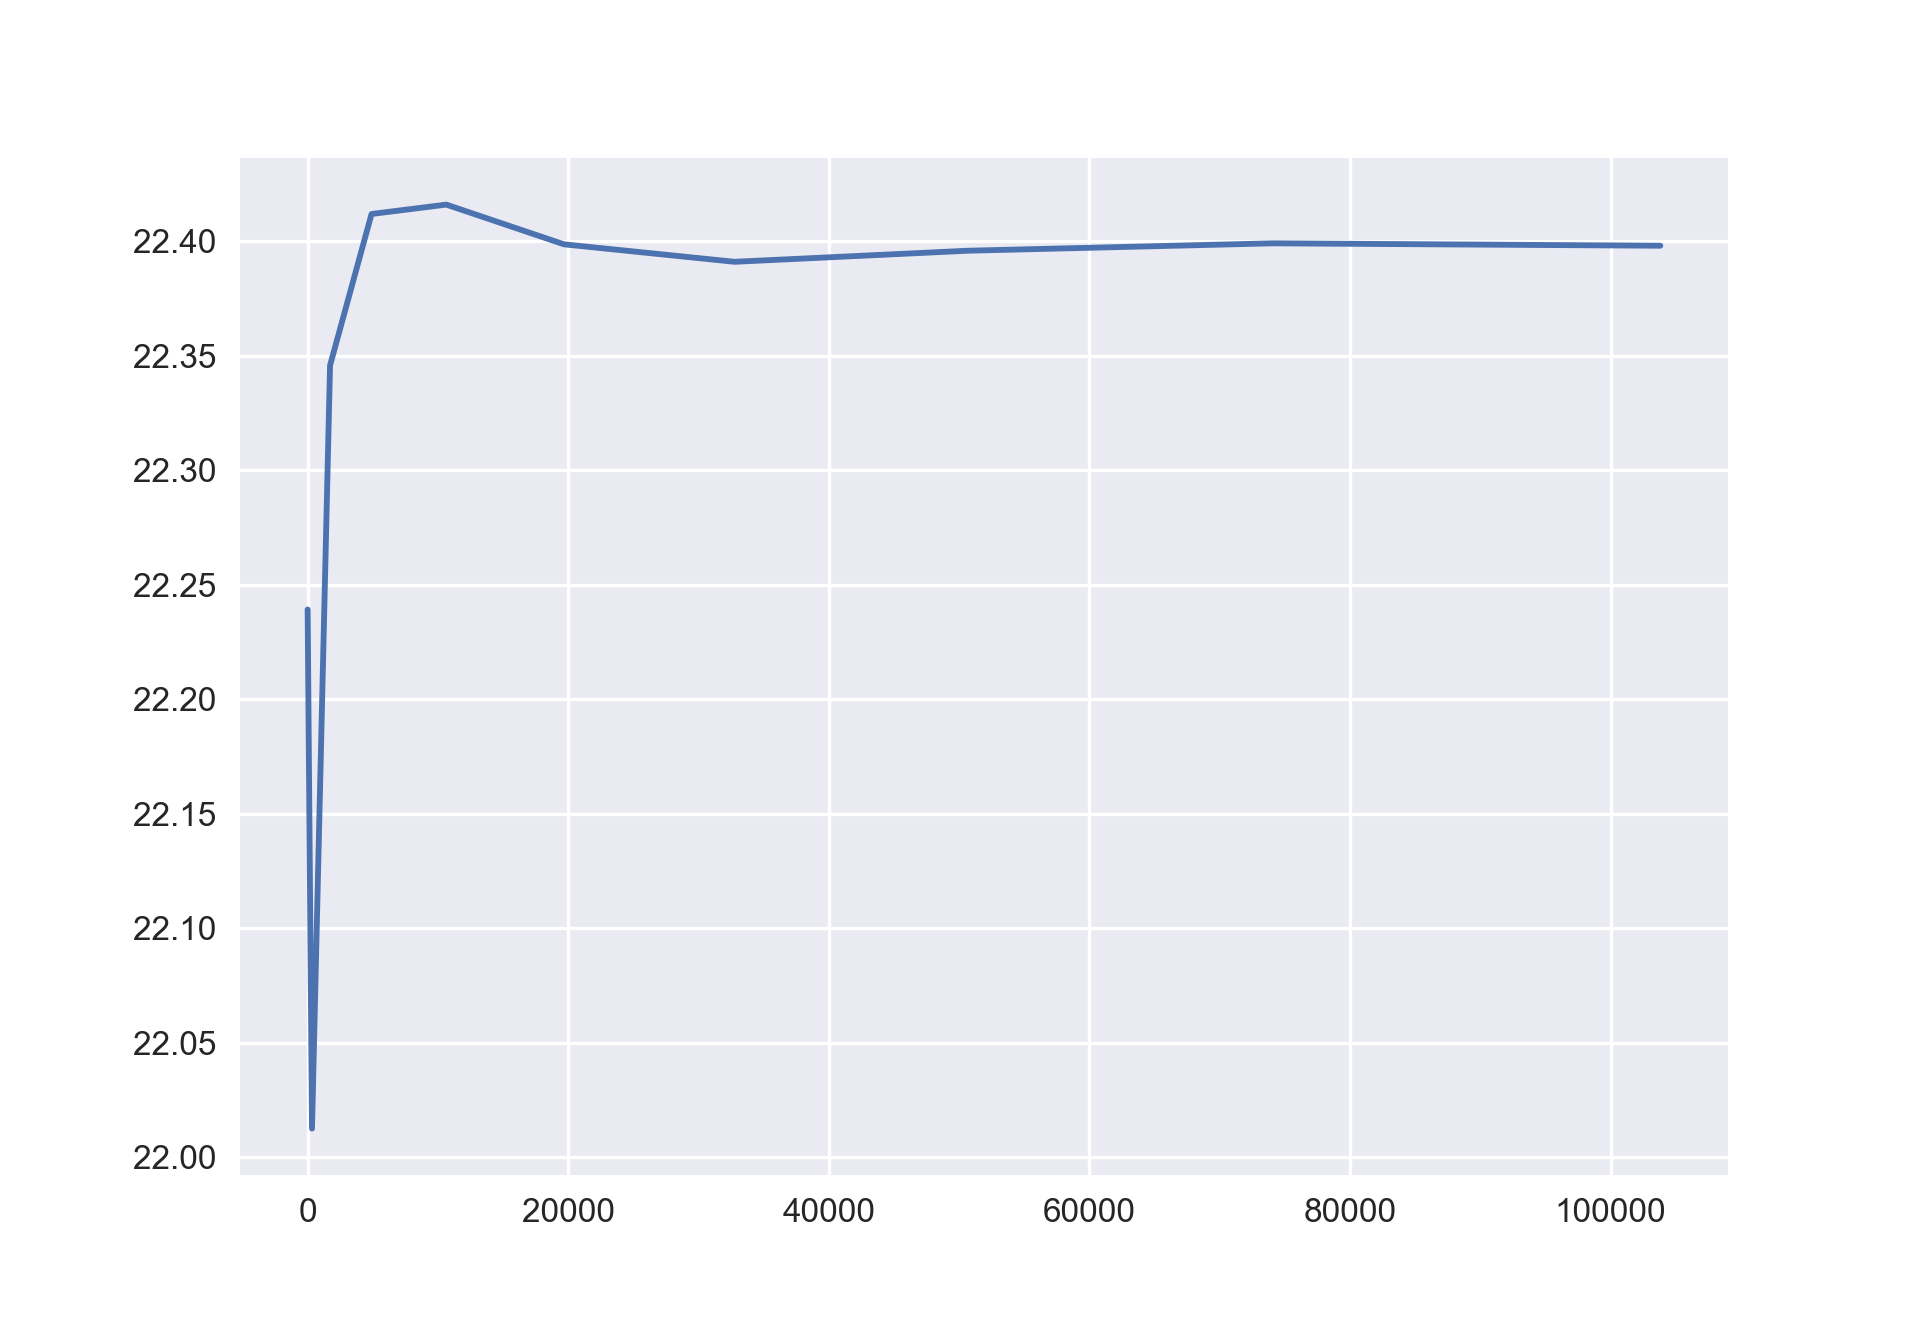

Divisions  2
rectangles:  10.7397287123
rectangles te:  22.2391670056
Divisions  7
rectangles:  11.4006723515
rectangles te:  22.0125168079
Divisions  12
rectangles:  11.5489246224
rectangles te:  22.3456822641
Divisions  17
rectangles:  11.5527437398
rectangles te:  22.4118134358
Divisions  22
rectangles:  11.5564945107
rectangles te:  22.4159135908
Divisions  27
rectangles:  11.5406716231
rectangles te:  22.3985637249
Divisions  32
rectangles:  11.5413364317
rectangles te:  22.3909427498
Divisions  37
rectangles:  11.5379891528
rectangles te:  22.3957706327
Divisions  42
rectangles:  11.5358345548
rectangles te:  22.3990061424
Divisions  47
rectangles:  11.5396714228
rectangles te:  22.3979580547


In [75]:
ndivisions = range(2, 50, 5)
exact_fl = False
improved = False
symmetry = False
err_correlation = True
location = '/Users/jeremyjorgensen/Codes/BZI/plots'
file_names = ["temp_fl", "improved_tet_te_conv1", "error_correlation1"]
EPM_name = "Al"
convention = "angular"
create_convergence_plot(Al_EPM, ndivisions, exact_fl, improved, symmetry,
                        file_names, location, err_correlation,
                        convention=convention)

Tests to make sure the integration is performed correctly

<IPython.core.display.Javascript object>


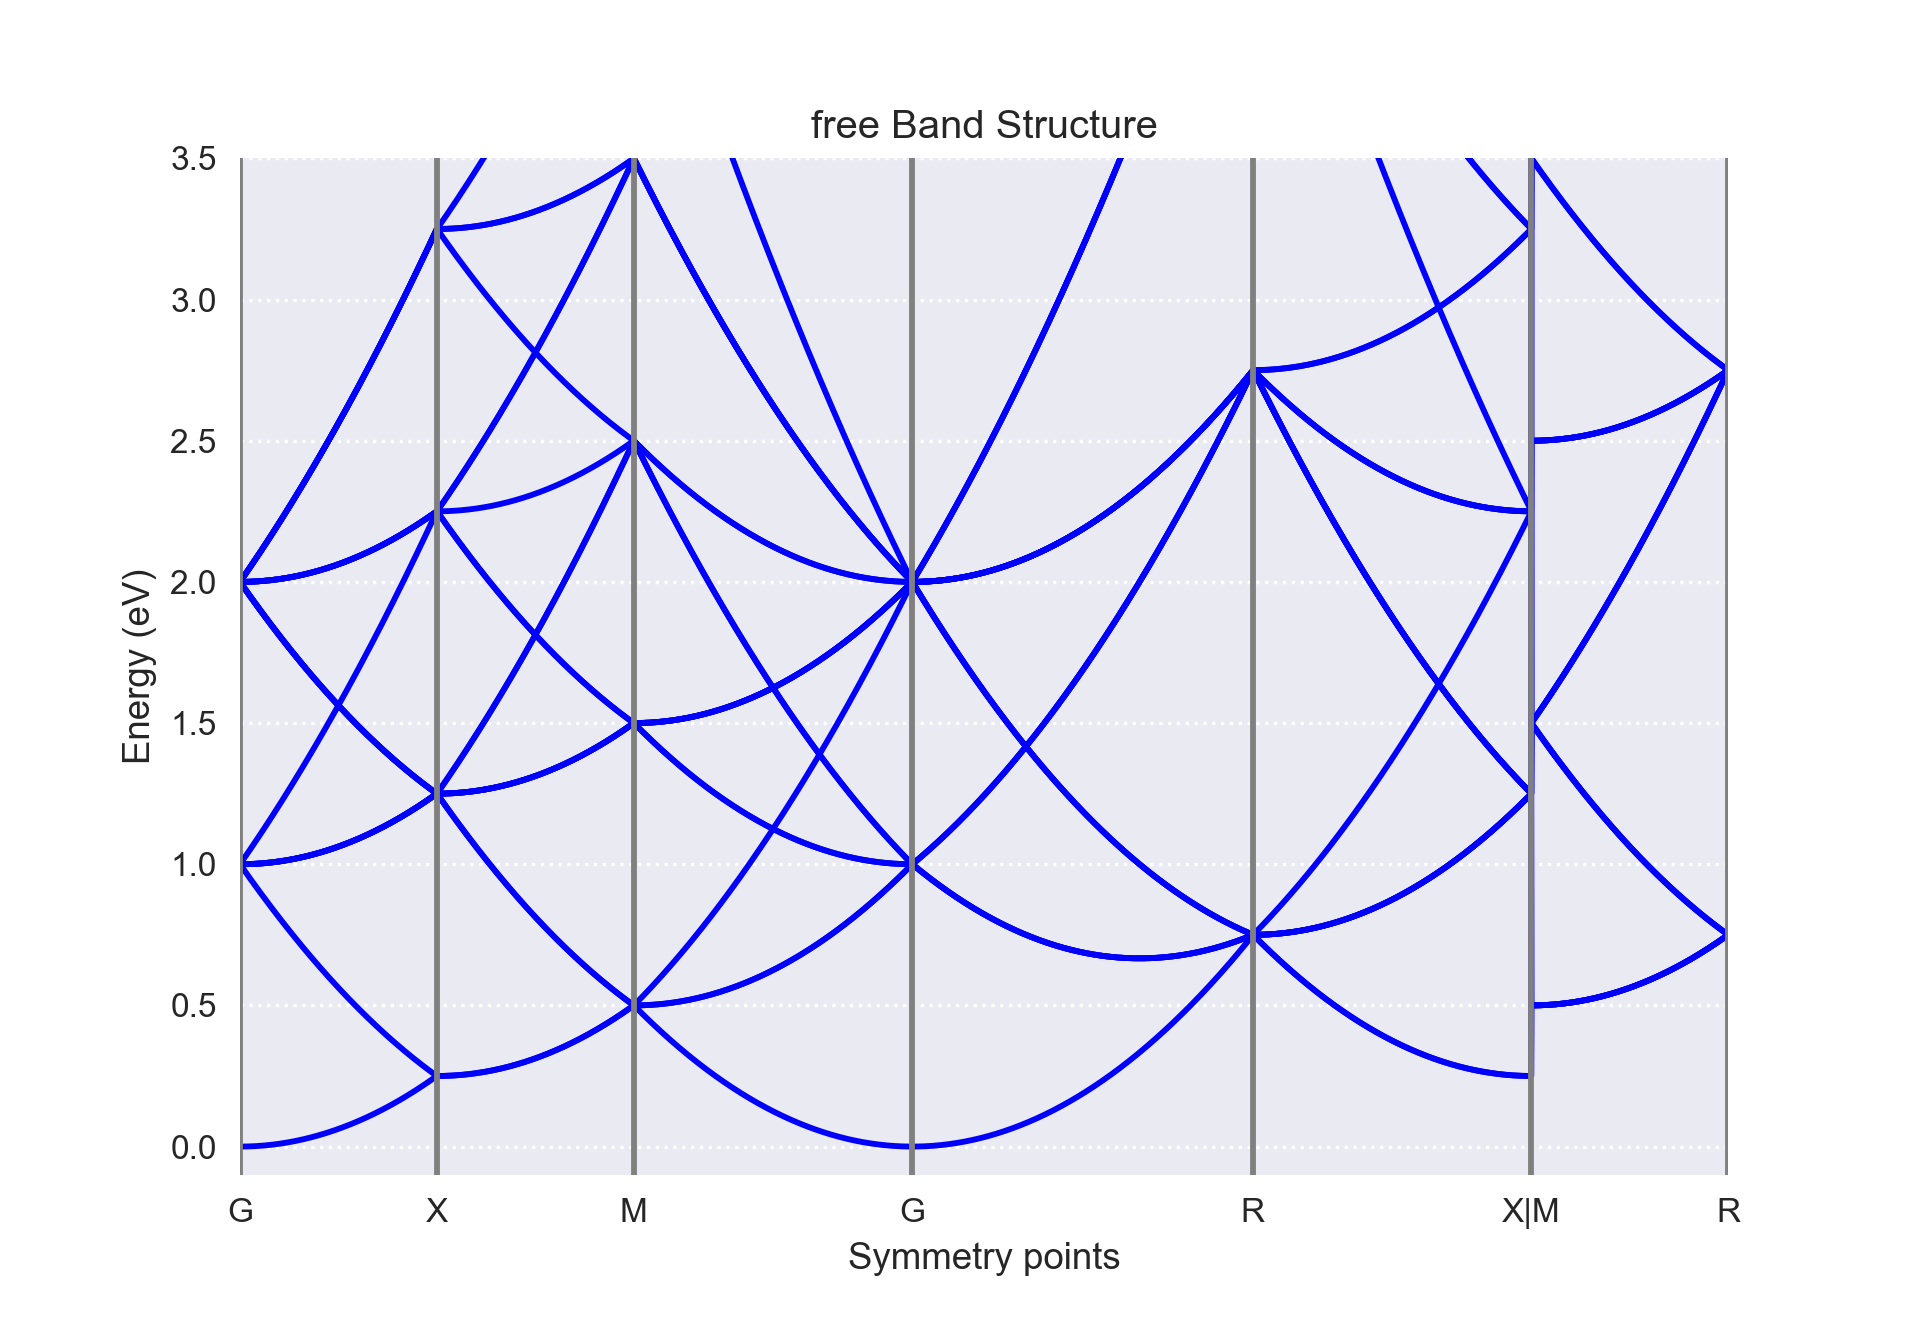

In [16]:
free_energy_shift = free_EPM.eval([0.]*3,1)[0]
free_args = {"materials_list": ["free"],
           "EPMlist": [multiple_free_EPM],
           "EPMargs_list": [{"neigvals": 1}],
           "lattice": free_EPM.lattice,
           "npts": 1000,
           "neigvals": 19,
           "energy_shift": free_energy_shift,
           "energy_limits": [-0.1,3.5],
           "show": True}

plot_band_structure(**free_args)

<IPython.core.display.Javascript object>


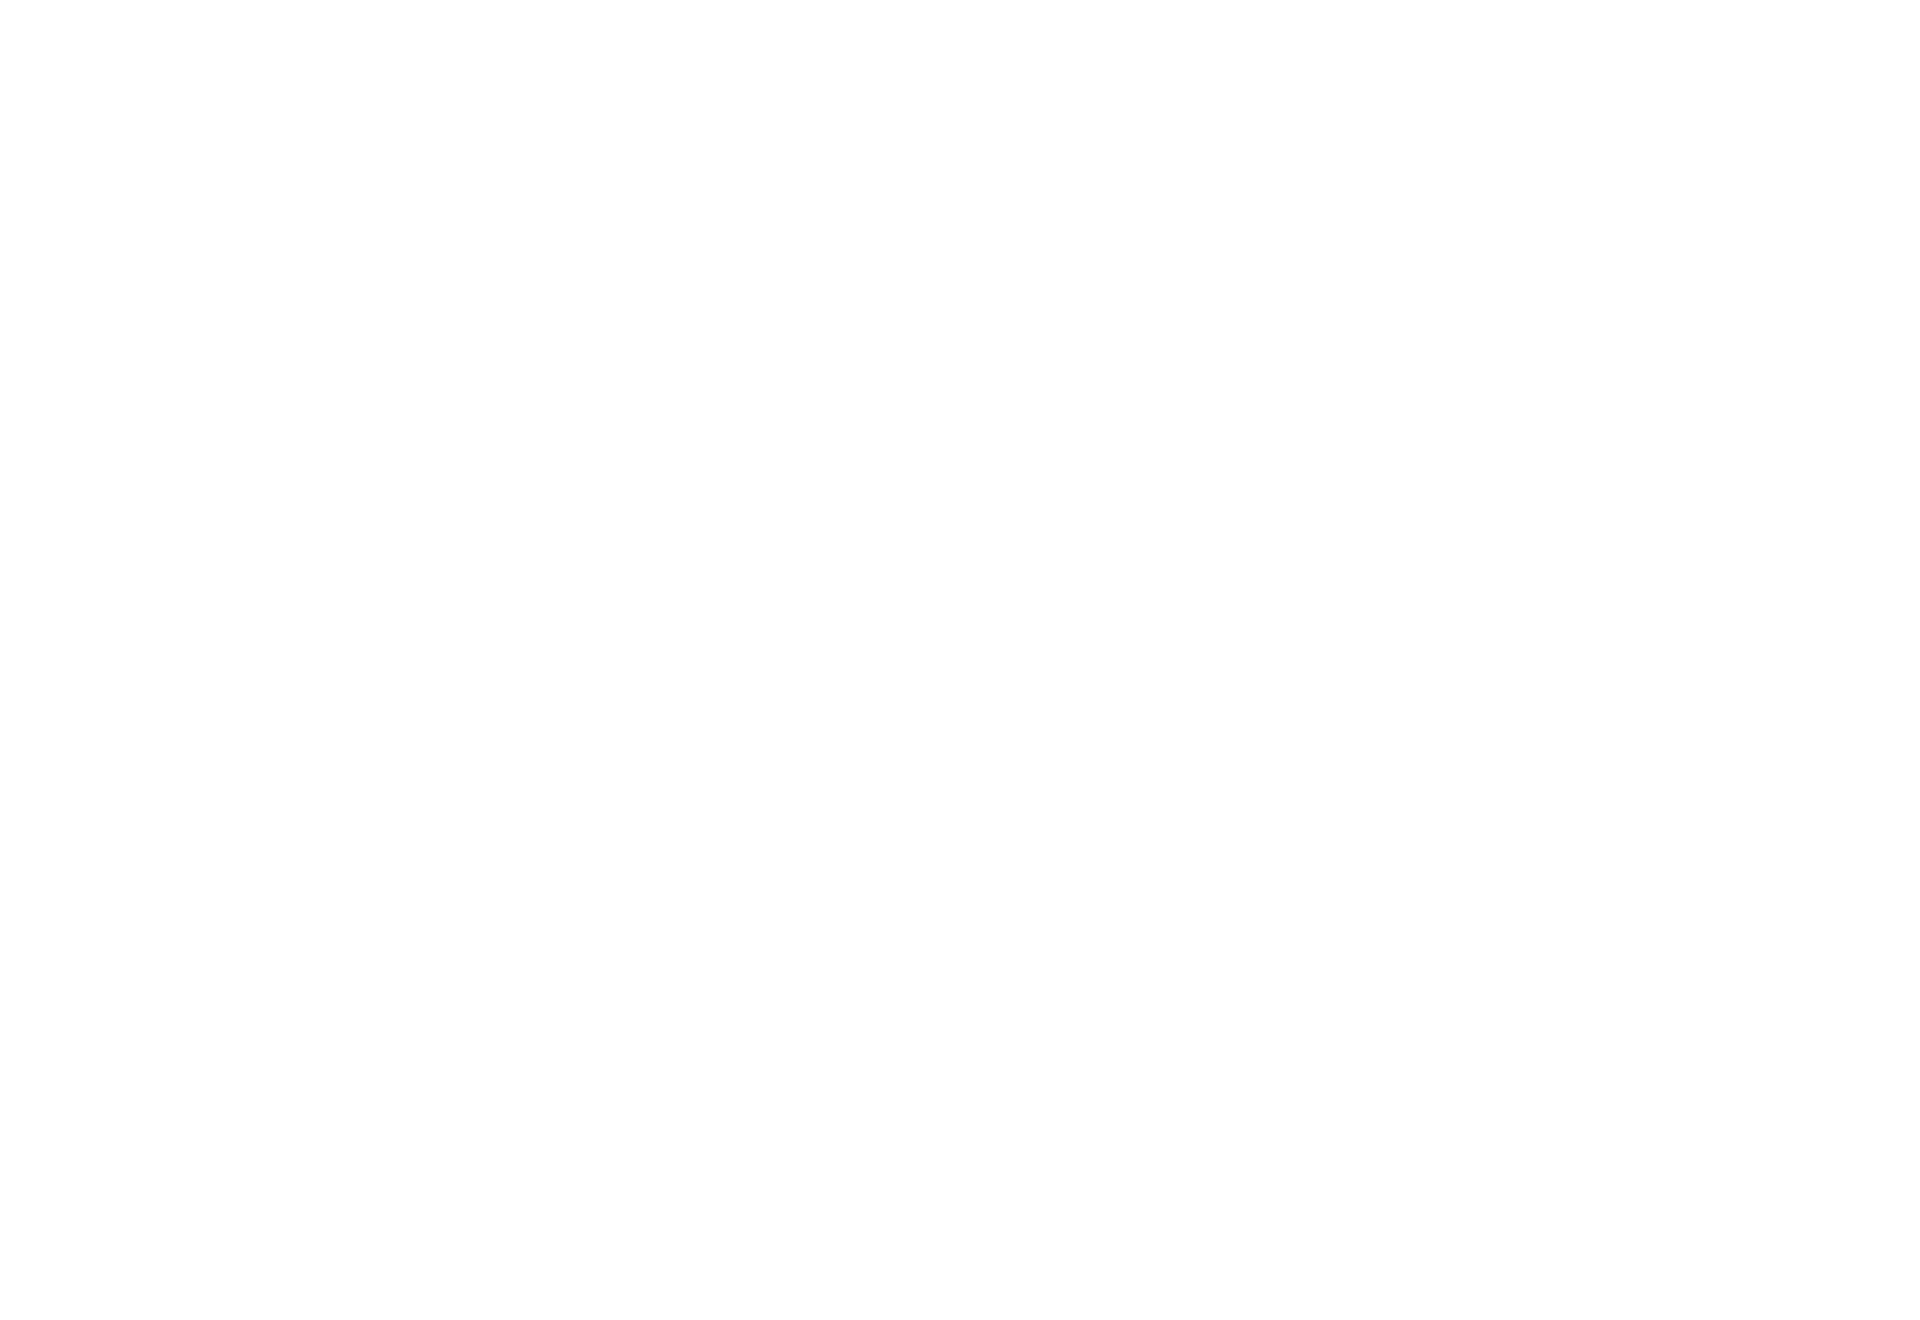

<IPython.core.display.Javascript object>


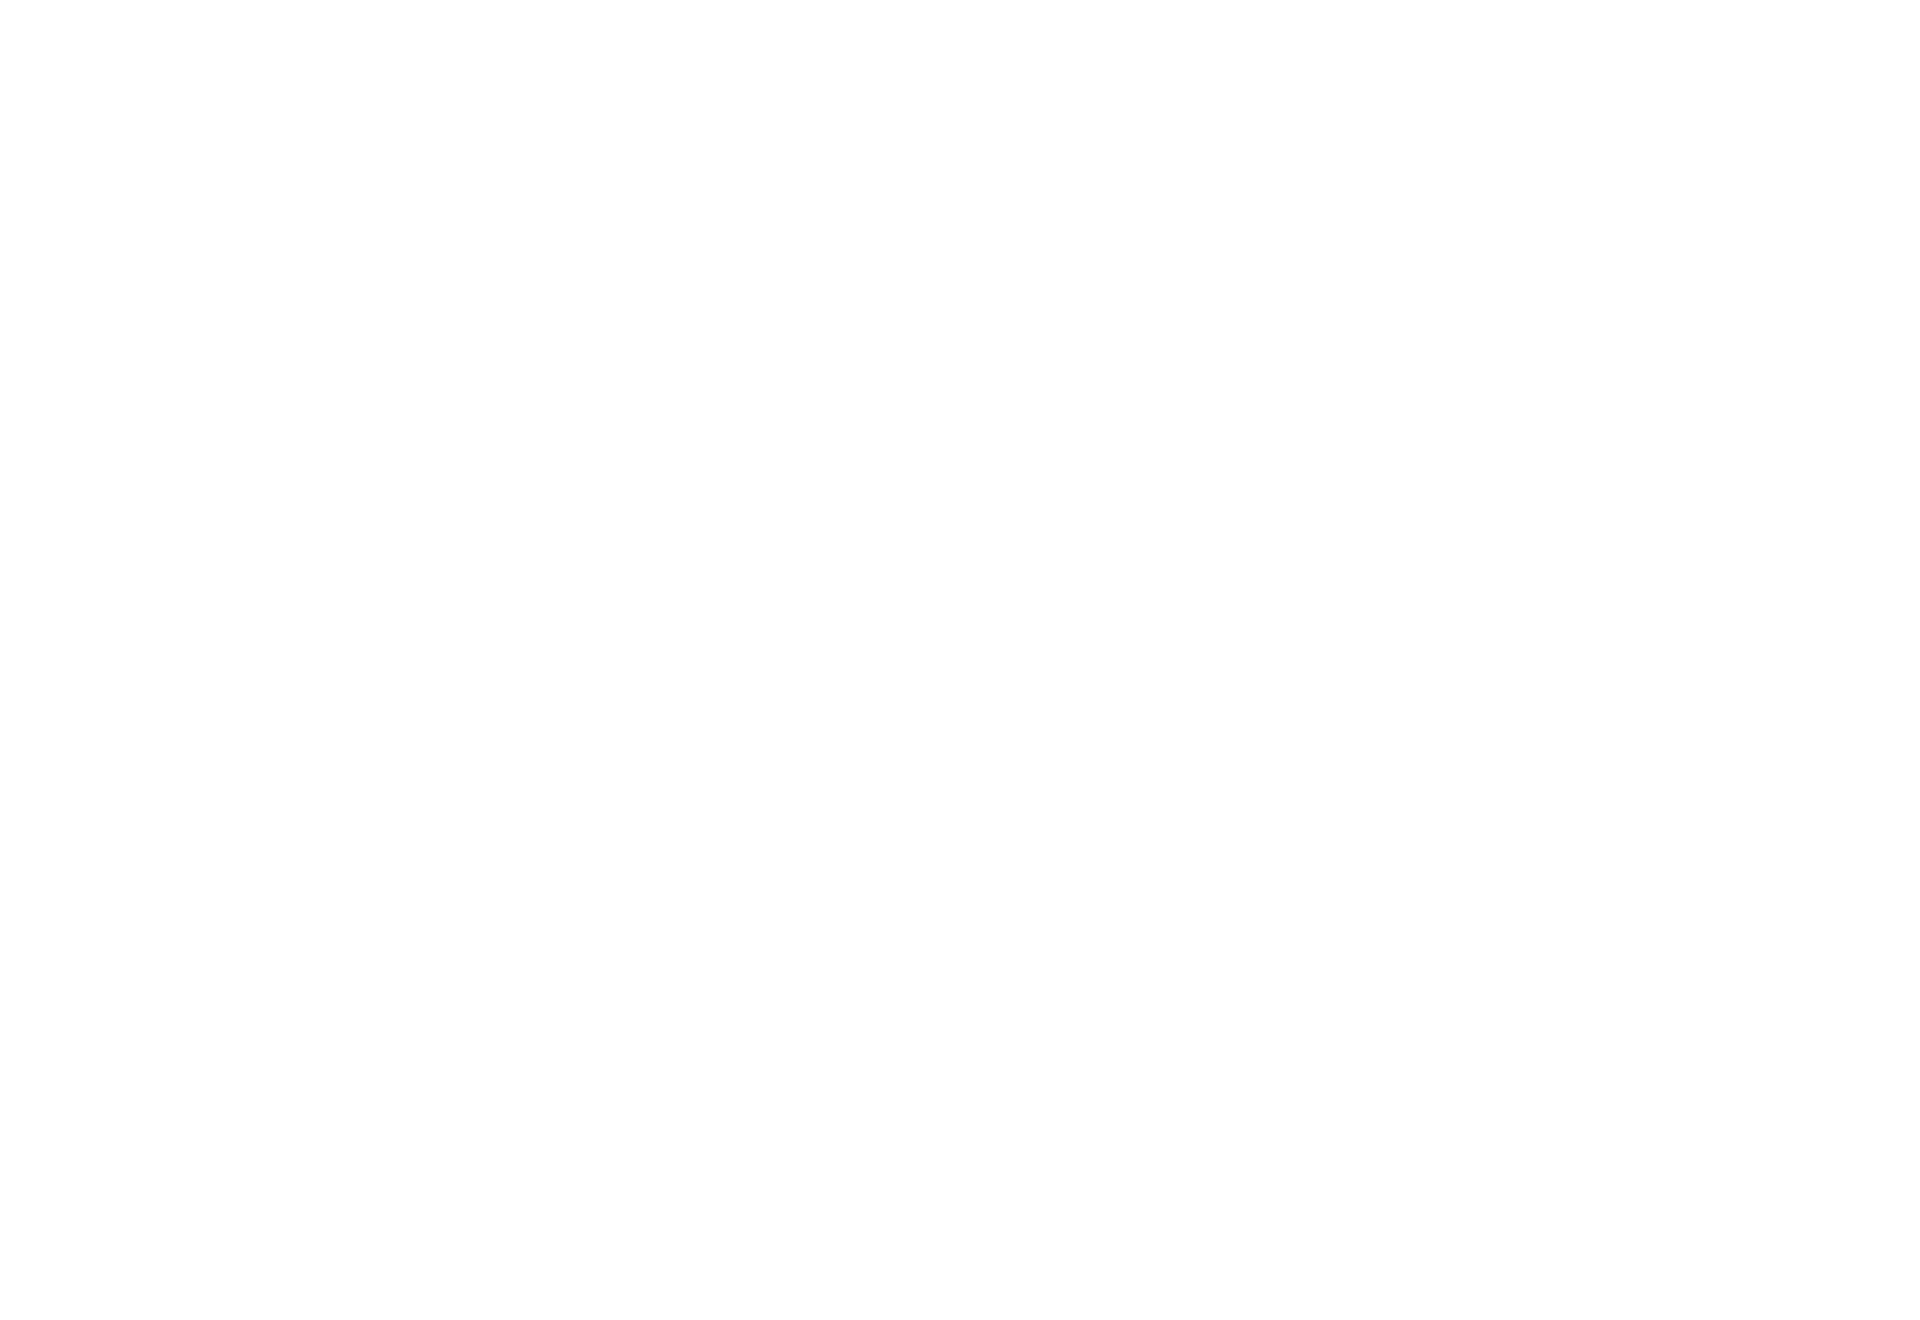

Divisions  2
rectangles te:  0.9375
tetrahedra te  0.375
run time 0.05747485160827637
Divisions  3
rectangles te:  0.555555555556
tetrahedra te  0.3055555555555556
run time 0.1461801528930664
Divisions  4
rectangles te:  0.984375
tetrahedra te  0.28125
run time 0.3076772689819336
Divisions  5
rectangles te:  0.72
tetrahedra te  0.27
run time 0.5786118507385254
Divisions  6
rectangles te:  0.993055555556
tetrahedra te  0.2638888888888889
run time 0.9628570079803467
Divisions  7
rectangles te:  0.795918367347
tetrahedra te  0.260204081632653
run time 1.5301079750061035
Divisions  8
rectangles te:  0.99609375
tetrahedra te  0.2578125
run time 2.2712719440460205
Divisions  9
rectangles te:  0.83950617284
tetrahedra te  0.25617283950617287
run time 3.4476230144500732
Divisions  10
rectangles te:  0.9975
tetrahedra te  0.255
run time 4.901078939437866


AttributeError: 'MultipleFreeElectronModel' object has no attribute 'material'

In [22]:
conv_args = {"EPM": multiple_free_EPM,
             "ndivisions": range(2, 11),
             "degree": 2,
             "exact_fl": True,
             "improved": False,
             "symmetry": False,
             "err_correlation": False,
             "file_names": ["fl_convergence", "improved_tet_te_conv1", "error_correlation1"],
             "location": "/Users/jeremyjorgensen/Codes/BZI/plots/"}

create_convergence_plot(**conv_args)